In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Load the data
df_aapl = pd.read_csv('data/AAPL.csv')
df_adbe = pd.read_csv('data/ADBE.csv')
df_amd = pd.read_csv('data/AMD.csv')
df_cmcsa = pd.read_csv('data/CMCSA.csv')
df_cost = pd.read_csv('data/COST.csv')
df_intc = pd.read_csv('data/INTC.csv')
df_intu = pd.read_csv('data/INTU.csv')
df_msft = pd.read_csv('data/MSFT.csv')
df_qcom = pd.read_csv('data/QCOM.csv')
df_sbux = pd.read_csv('data/SBUX.csv')

# List of DataFrames
dfs = [df_aapl, df_adbe, df_amd, df_cmcsa, df_cost, df_intc, df_intu, df_msft, df_qcom, df_sbux]

for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)

In [3]:
for df in dfs:
    print(df.describe())

                Low          Open        Volume          High         Close  \
count  10590.000000  10590.000000  1.059000e+04  10590.000000  10590.000000   
mean      16.141083     16.323966  3.279584e+08     16.509548     16.332145   
std       34.495971     34.904787  3.379549e+08     35.327844     34.928490   
min        0.049107      0.049665  0.000000e+00      0.049665      0.049107   
25%        0.280134      0.286663  1.215564e+08      0.293699      0.286830   
50%        0.477500      0.484375  2.151240e+08      0.493304      0.484375   
75%       15.800536     16.009286  4.070262e+08     16.179196     15.968750   
max      179.119995    182.630005  7.421641e+09    182.940002    182.009995   

       Adjusted Close  
count    10590.000000  
mean        15.660952  
std         34.596796  
min          0.038213  
25%          0.237230  
50%          0.401782  
75%         13.831447  
max        180.959747  
               Low         Open        Volume         High        Close 

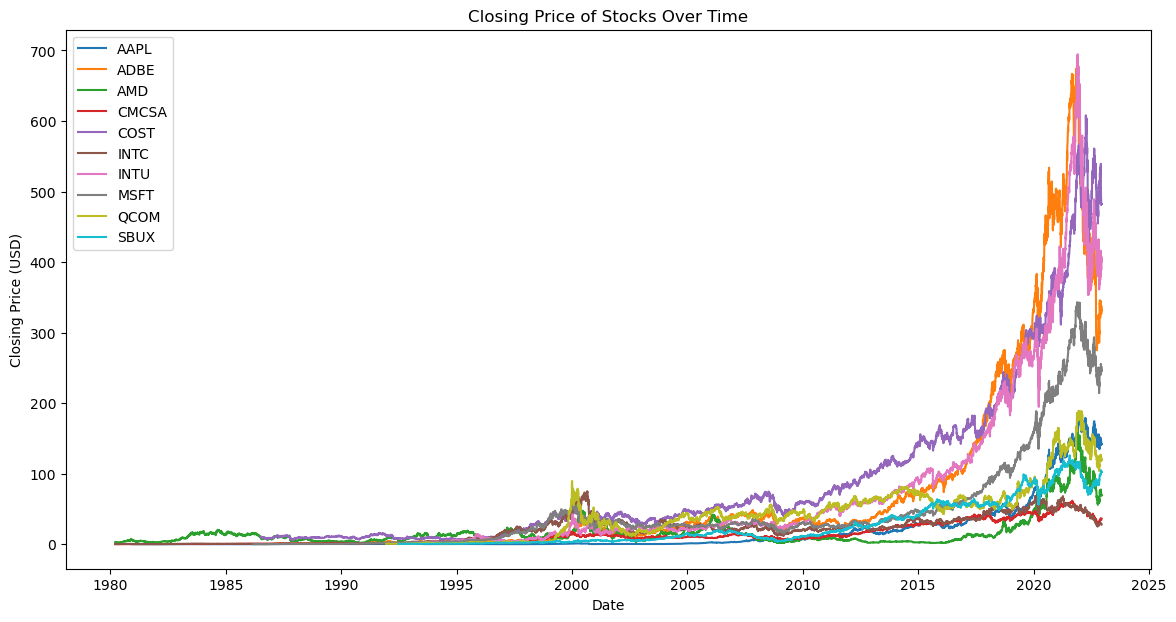

In [4]:
import matplotlib.pyplot as plt

# Plotting all stocks' closing prices
plt.figure(figsize=(14, 7))
for df, label in zip(dfs, ['AAPL', 'ADBE', 'AMD', 'CMCSA', 'COST', 'INTC', 'INTU', 'MSFT', 'QCOM', 'SBUX']):
    plt.plot(df.index, df['Close'], label=label)

plt.title('Closing Price of Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [5]:
# Function to remove rows before 2005 and reset the index
def remove_before_2005(df):
    df = df[df.index.year >= 2005]
    df.reset_index(inplace=True)
    return df

dfs = [remove_before_2005(df) for df in dfs]
df_aapl, df_adbe, df_amd, df_cmcsa, df_cost, df_intc, df_intu, df_msft, df_qcom, df_sbux = dfs

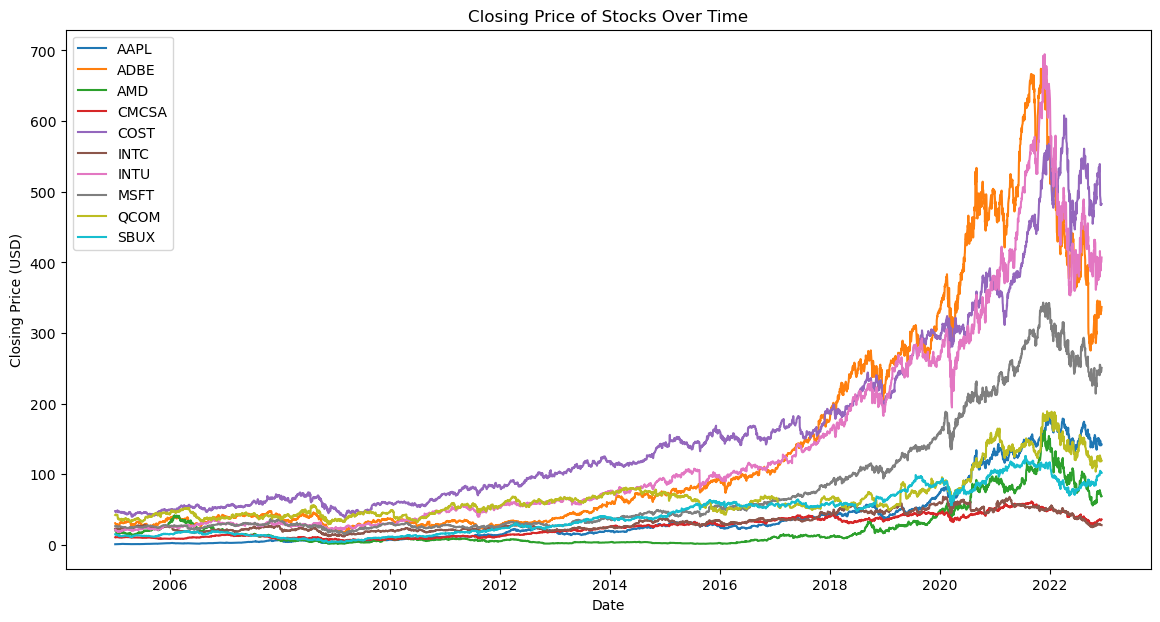

In [7]:
import matplotlib.pyplot as plt

# Plotting all stocks' closing prices after filtering the data
plt.figure(figsize=(14, 7))
for df, label in zip(dfs, ['AAPL', 'ADBE', 'AMD', 'CMCSA', 'COST', 'INTC', 'INTU', 'MSFT', 'QCOM', 'SBUX']):
    plt.plot(df['Date'], df['Close'], label=label)

plt.title('Closing Price of Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


In [8]:
descriptive_stats = [df.describe().T for df in dfs]
desc_aapl, desc_adbe, desc_amd, desc_cmcsa, desc_cost, desc_intc, desc_intu, desc_msft, desc_qcom, desc_sbux = descriptive_stats

print(desc_adbe)


                 count          mean           std        min           25%  \
Low             4518.0  1.415140e+02  1.600728e+02      15.70  3.314250e+01   
Open            4518.0  1.433818e+02  1.623074e+02      15.71  3.348250e+01   
Volume          4518.0  4.652899e+06  3.880090e+06  589200.00  2.423975e+06   
High            4518.0  1.450906e+02  1.642486e+02      16.48  3.387250e+01   
Close           4518.0  1.433856e+02  1.622377e+02      15.98  3.353000e+01   
Adjusted Close  4518.0  1.433856e+02  1.622377e+02      15.98  3.353000e+01   

                         50%           75%           max  
Low             5.787000e+01  2.327500e+02  6.789100e+02  
Open            5.820500e+01  2.363000e+02  6.962800e+02  
Volume          3.674700e+06  5.725325e+06  1.087524e+08  
High            5.912500e+01  2.395825e+02  6.995400e+02  
Close           5.848000e+01  2.372550e+02  6.883700e+02  
Adjusted Close  5.848000e+01  2.372550e+02  6.883700e+02  


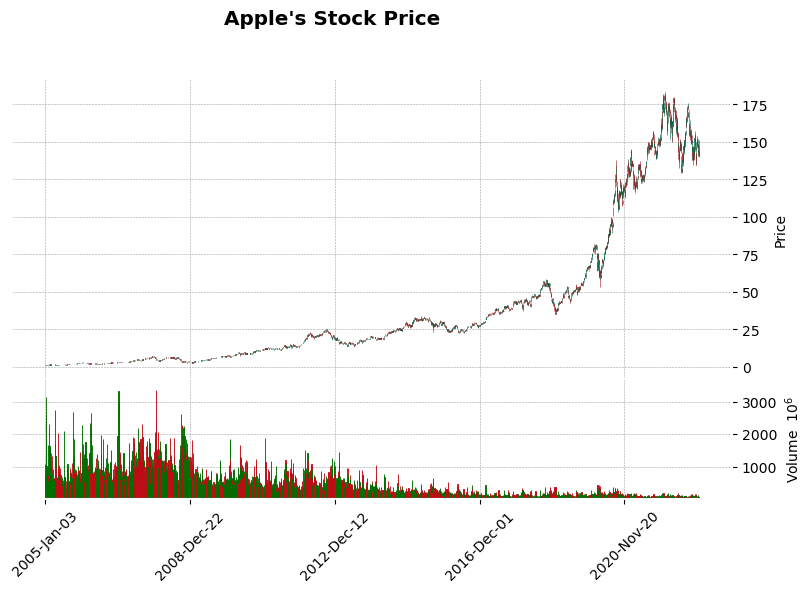

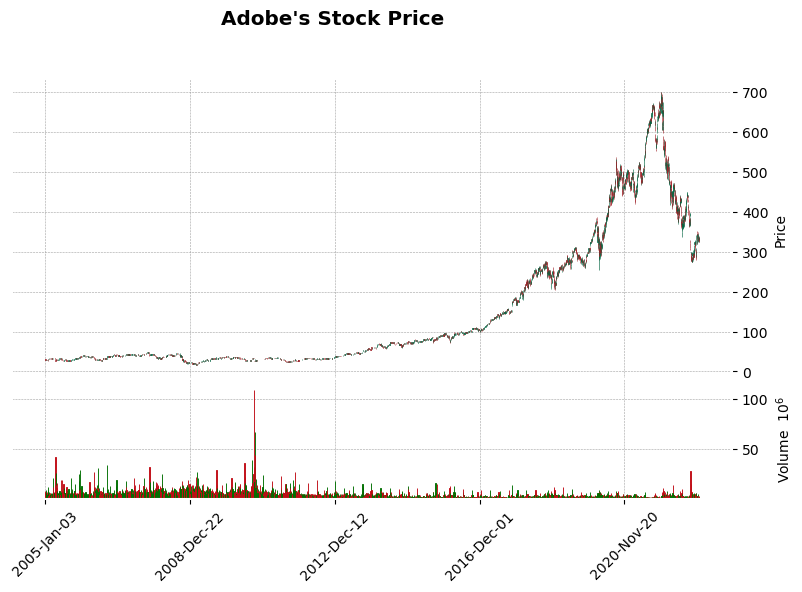

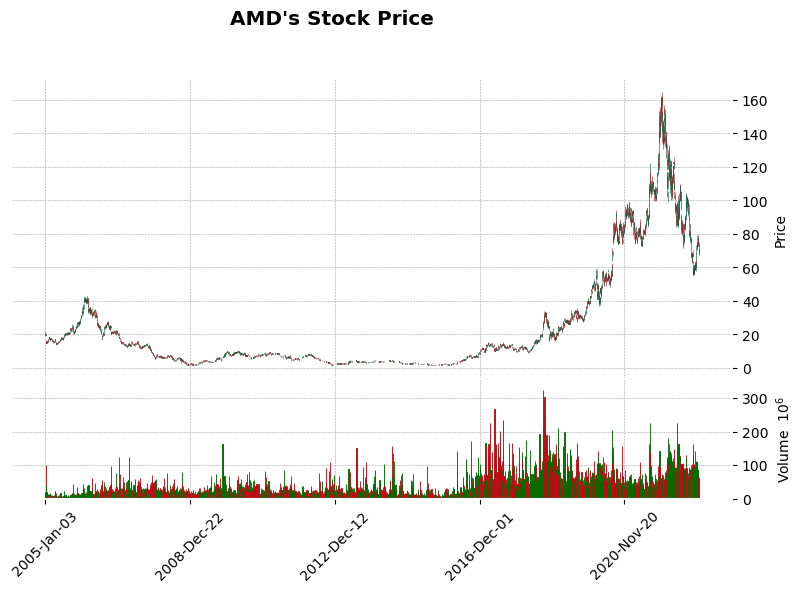

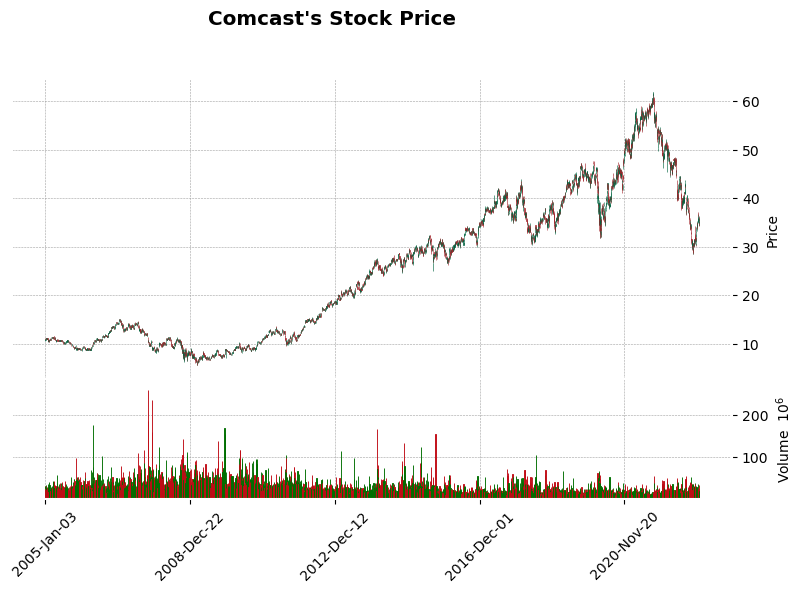

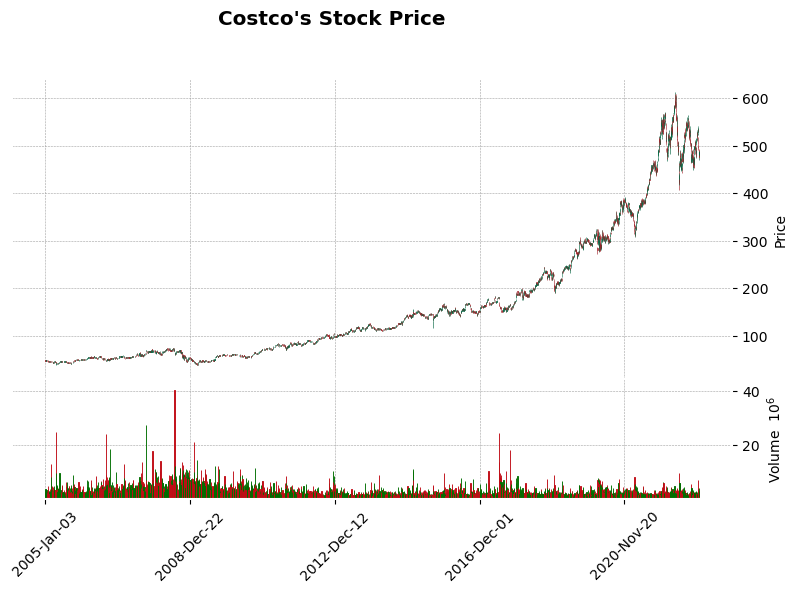

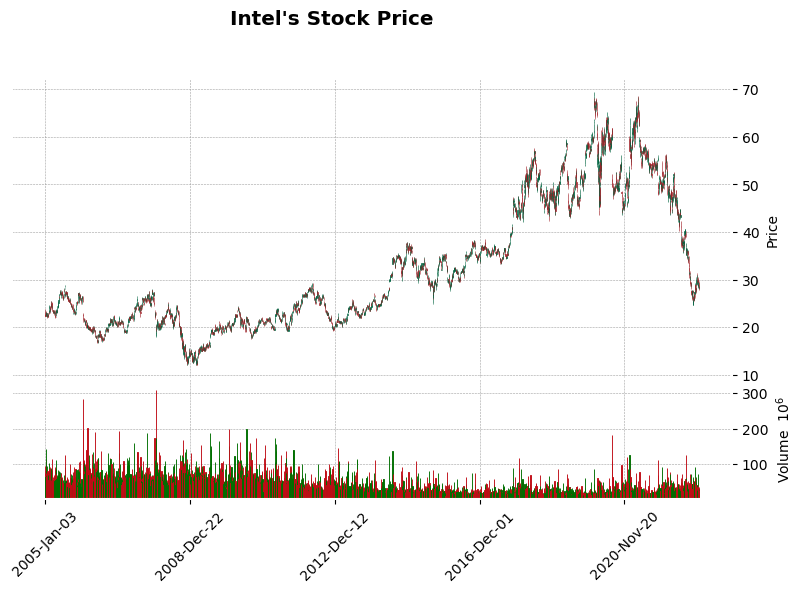

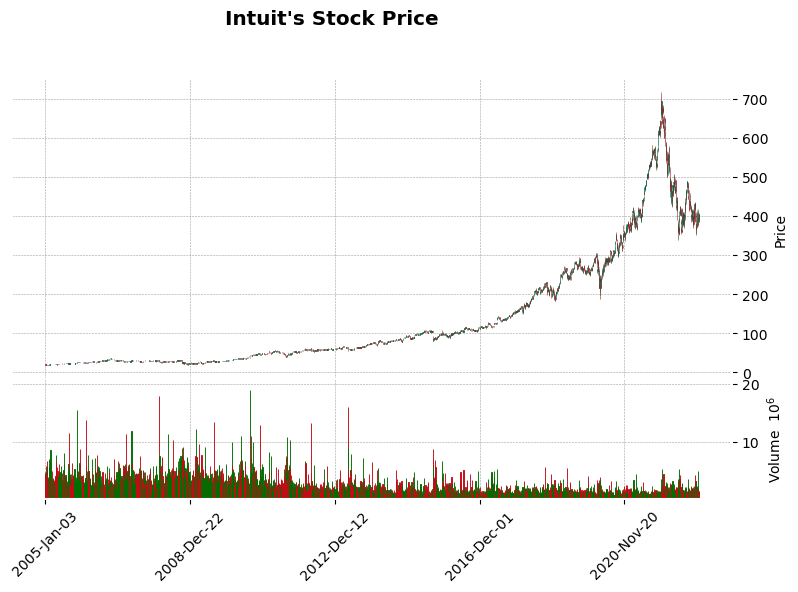

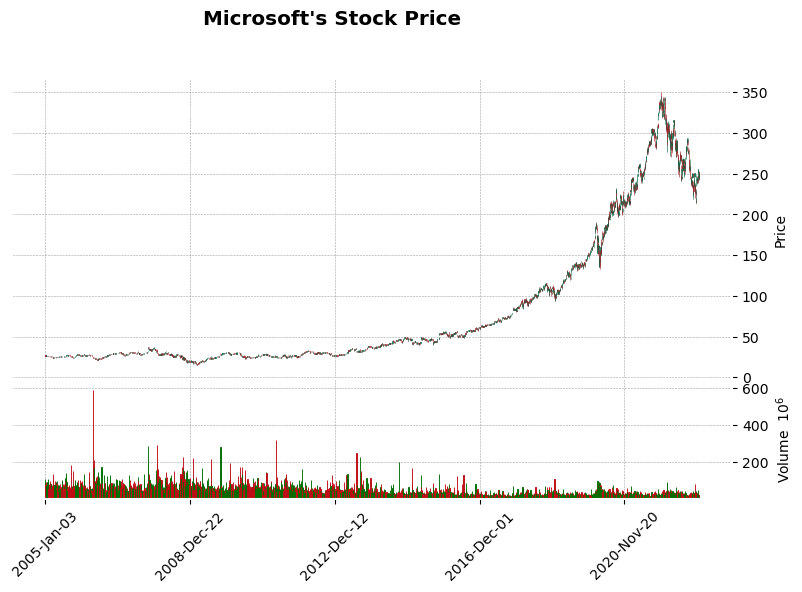

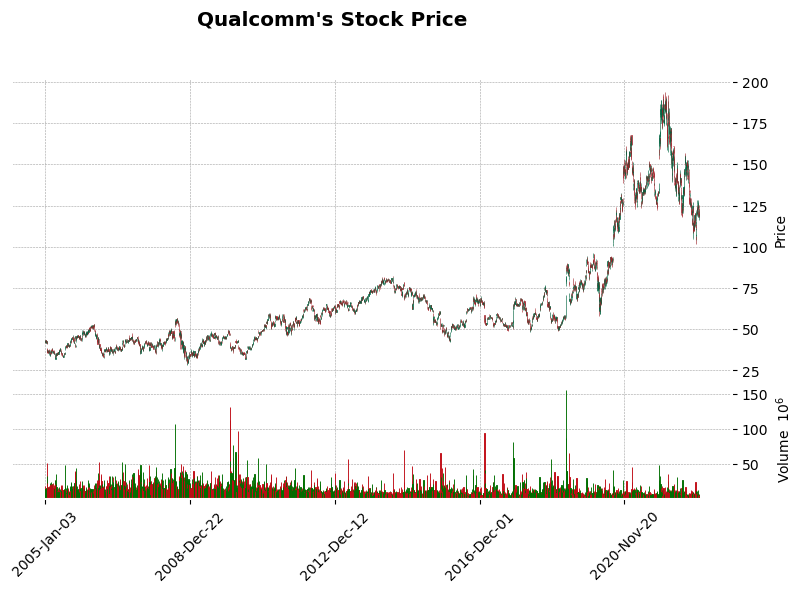

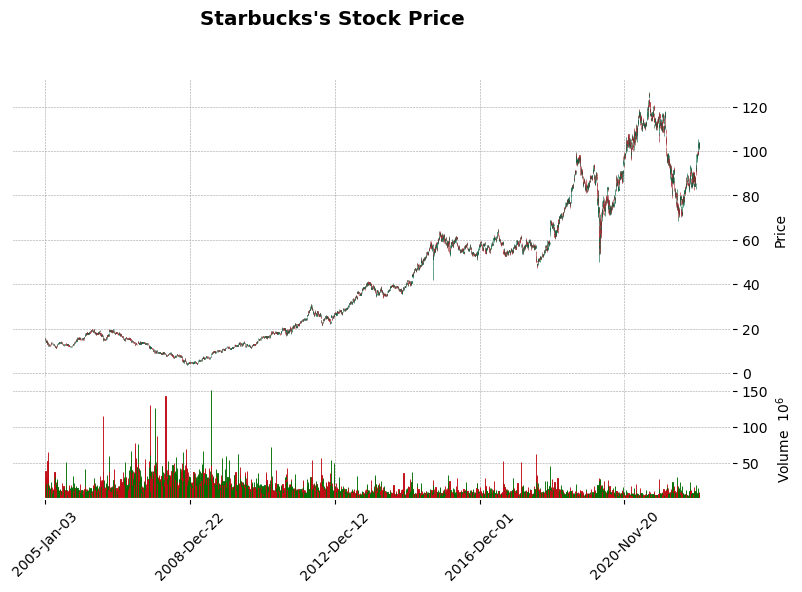

In [9]:
import mplfinance as mpf
import pandas as pd

# Function to visualize candlestick charts for all 10 stocks
def visualize_candlestick_charts(df_aapl, df_adbe, df_amd, df_cmcsa, df_cost, df_intc, df_intu, df_msft, df_qcom, df_sbux):
    stocks = [
        (df_aapl, "Apple's Stock Price"),
        (df_adbe, "Adobe's Stock Price"),
        (df_amd, "AMD's Stock Price"),
        (df_cmcsa, "Comcast's Stock Price"),
        (df_cost, "Costco's Stock Price"),
        (df_intc, "Intel's Stock Price"),
        (df_intu, "Intuit's Stock Price"),
        (df_msft, "Microsoft's Stock Price"),
        (df_qcom, "Qualcomm's Stock Price"),
        (df_sbux, "Starbucks's Stock Price")
    ]
    for df, title in stocks:
        if 'Date' not in df.index.names:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
        
        mpf.plot(df, type='candle', style='charles', title=title, ylabel='Price', volume=True, figsize=(10, 6))

visualize_candlestick_charts(df_aapl, df_adbe, df_amd, df_cmcsa, df_cost, df_intc, df_intu, df_msft, df_qcom, df_sbux)


In [11]:
for df, name in zip([df_aapl, df_adbe, df_amd, df_cmcsa, df_cost, df_intc, df_intu, df_msft, df_qcom, df_sbux], ['AAPL', 'ADBE', 'AMD', 'CMCSA', 'COST', 'INTC', 'INTU', 'MSFT', 'QCOM', 'SBUX']):
    df['Daily Return'] = df['Close'].pct_change()
    print(f"Volatility (std of daily returns) for {name}: {df['Daily Return'].std()}")
    print("\n")

Volatility (std of daily returns) for AAPL: 0.020859602277698962


Volatility (std of daily returns) for ADBE: 0.021573186069342318


Volatility (std of daily returns) for AMD: 0.03680499631458518


Volatility (std of daily returns) for CMCSA: 0.018008075488085782


Volatility (std of daily returns) for COST: 0.014391016615829417


Volatility (std of daily returns) for INTC: 0.019560553594632598


Volatility (std of daily returns) for INTU: 0.018852597131910974


Volatility (std of daily returns) for MSFT: 0.017387287742887916


Volatility (std of daily returns) for QCOM: 0.021477942883614532


Volatility (std of daily returns) for SBUX: 0.019525370813402804




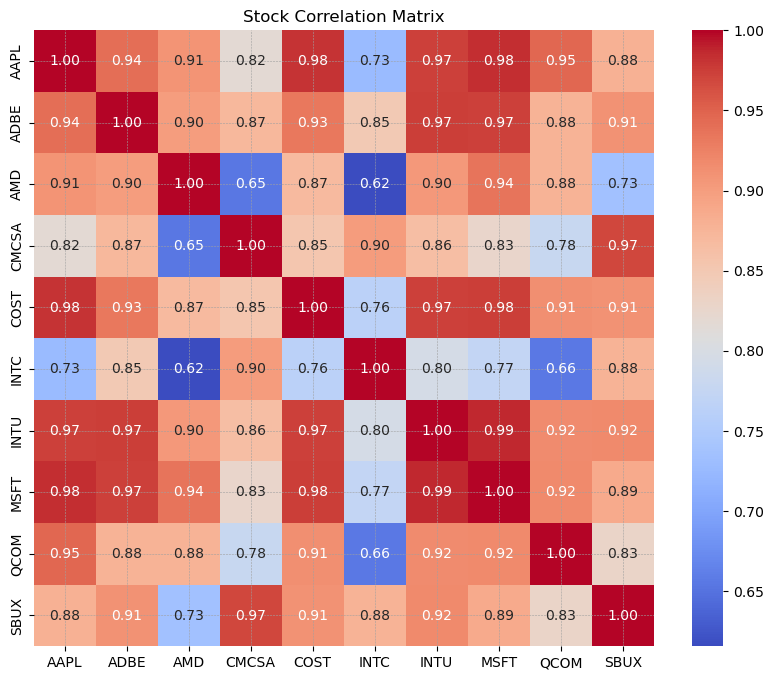

In [12]:
# Creating a new DataFrame for closing prices of each stock
closing_prices = pd.DataFrame()
labels = ['AAPL', 'ADBE', 'AMD', 'CMCSA', 'COST', 'INTC', 'INTU', 'MSFT', 'QCOM', 'SBUX']
for df, label in zip([df_aapl, df_adbe, df_amd, df_cmcsa, df_cost, df_intc, df_intu, df_msft, df_qcom, df_sbux], labels):
    closing_prices[label] = df['Close']

corr_matrix = closing_prices.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Stock Correlation Matrix')
plt.show()

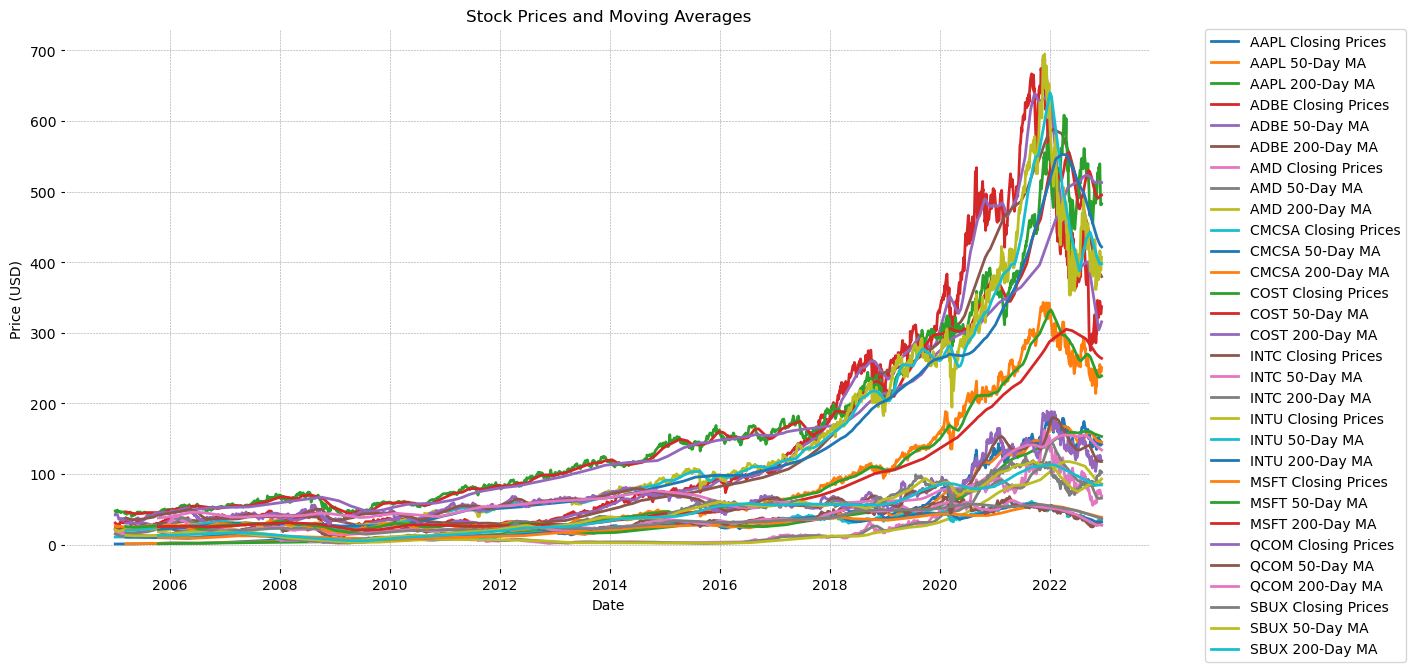

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

dfs = [df_aapl, df_adbe, df_amd, df_cmcsa, df_cost, df_intc, df_intu, df_msft, df_qcom, df_sbux]
labels = ['AAPL', 'ADBE', 'AMD', 'CMCSA', 'COST', 'INTC', 'INTU', 'MSFT', 'QCOM', 'SBUX']

for df, label in zip(dfs, labels):
    # Calculate moving averages
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MA200'] = df['Close'].rolling(window=200).mean()

    plt.plot(df.index, df['Close'], label=f'{label} Closing Prices')
    plt.plot(df.index, df['MA50'], label=f'{label} 50-Day MA')
    plt.plot(df.index, df['MA200'], label=f'{label} 200-Day MA')

plt.title('Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

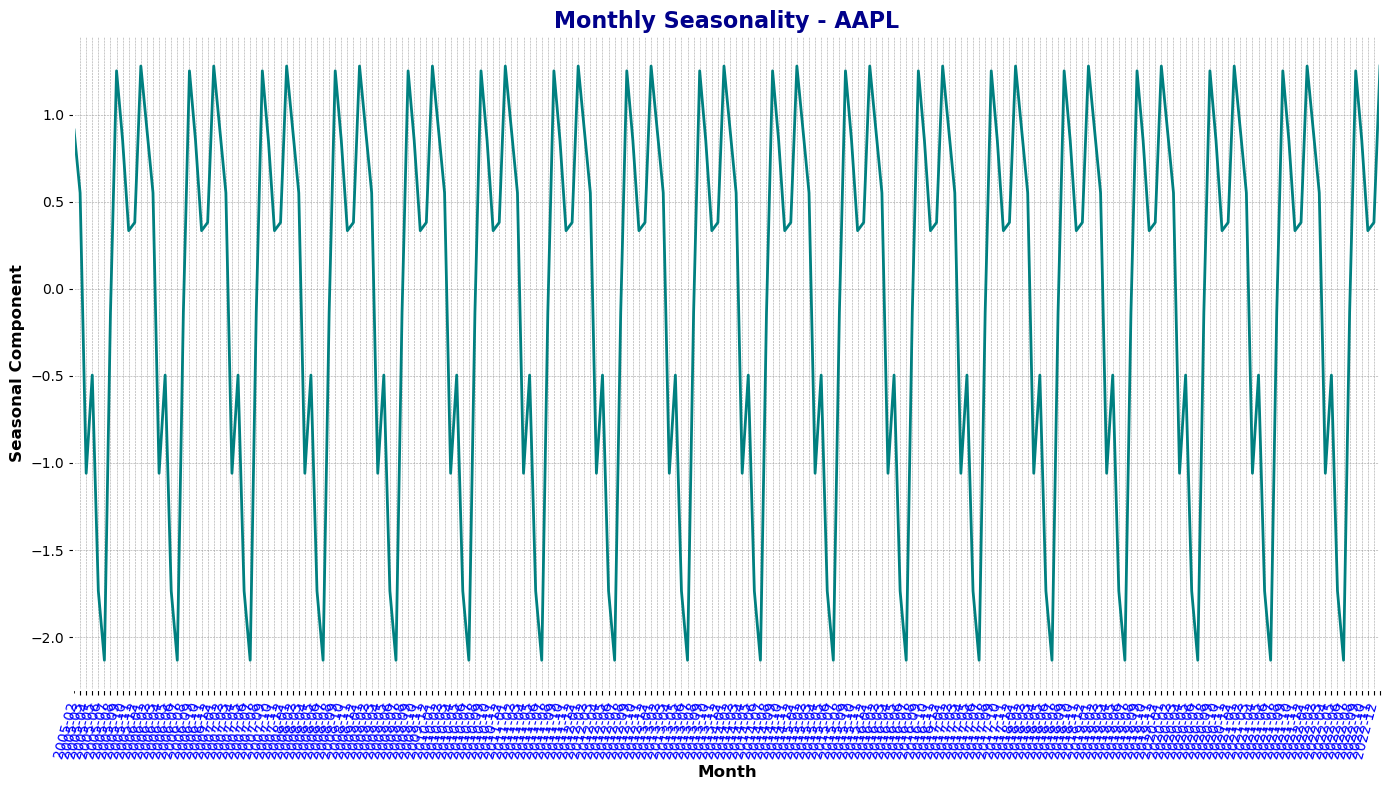

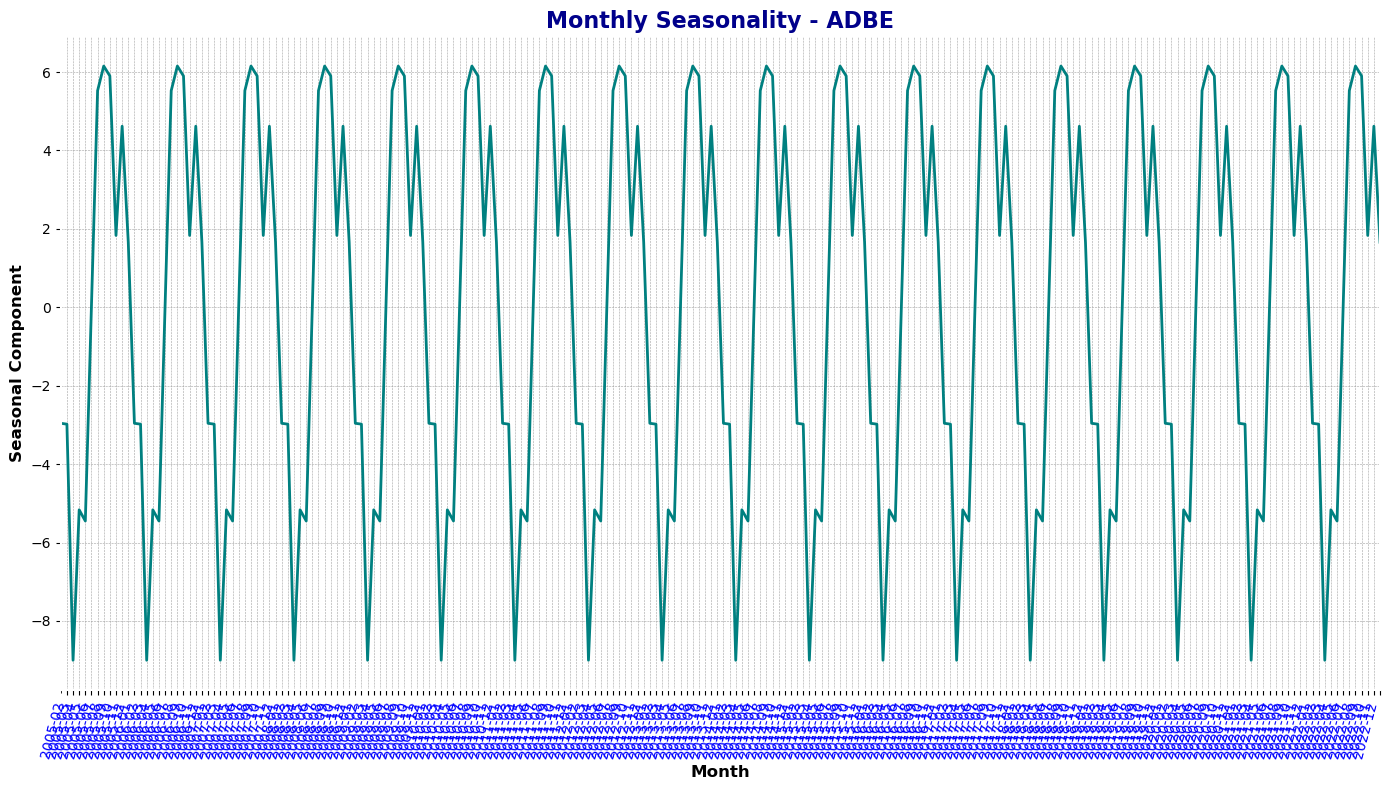

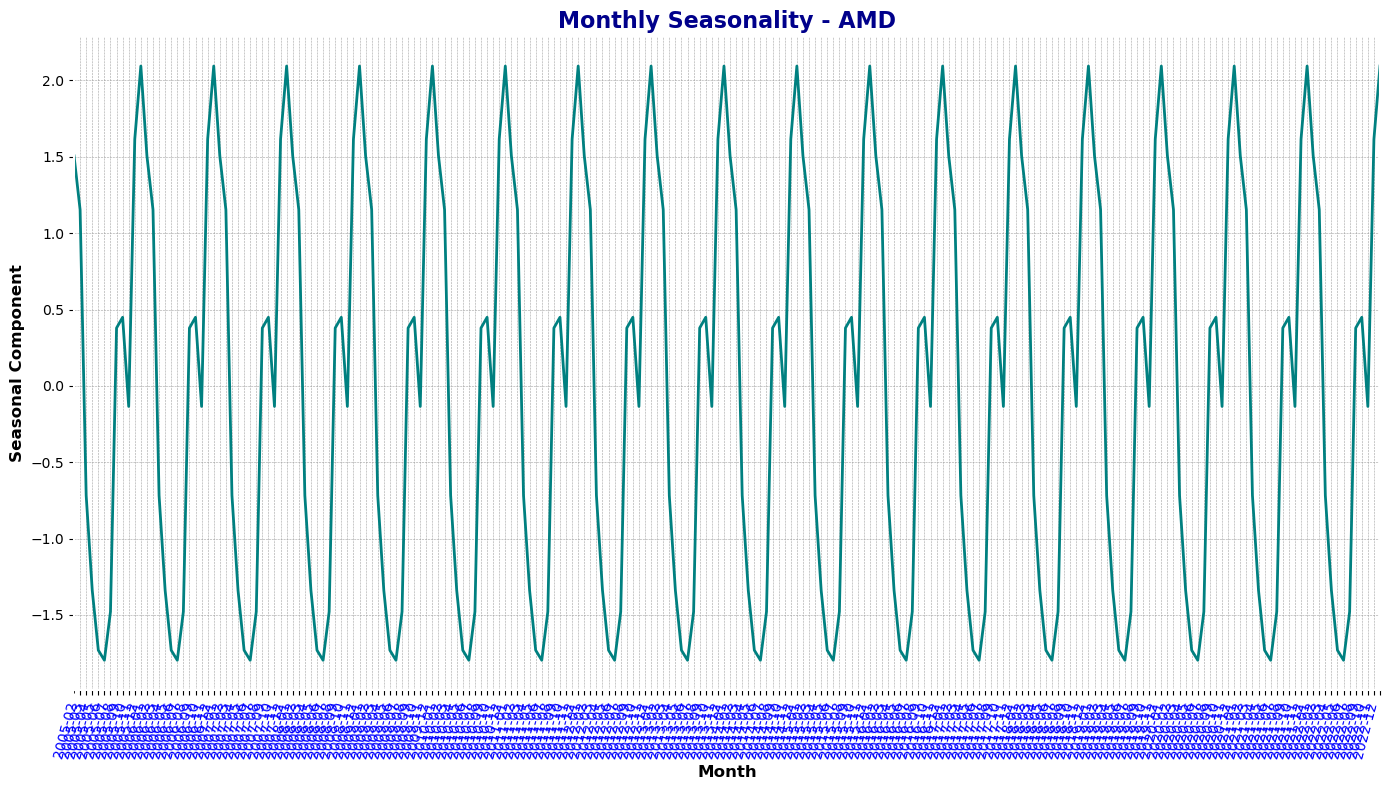

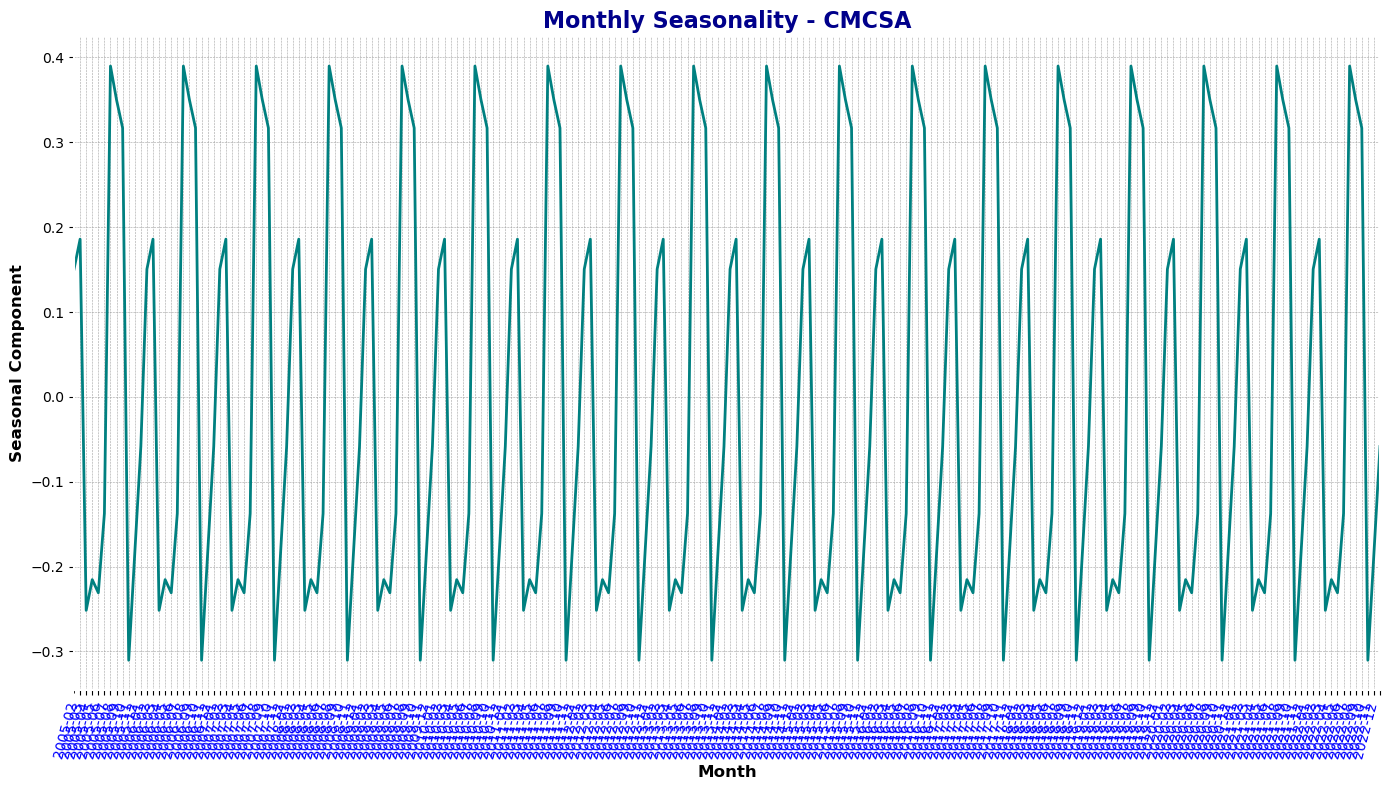

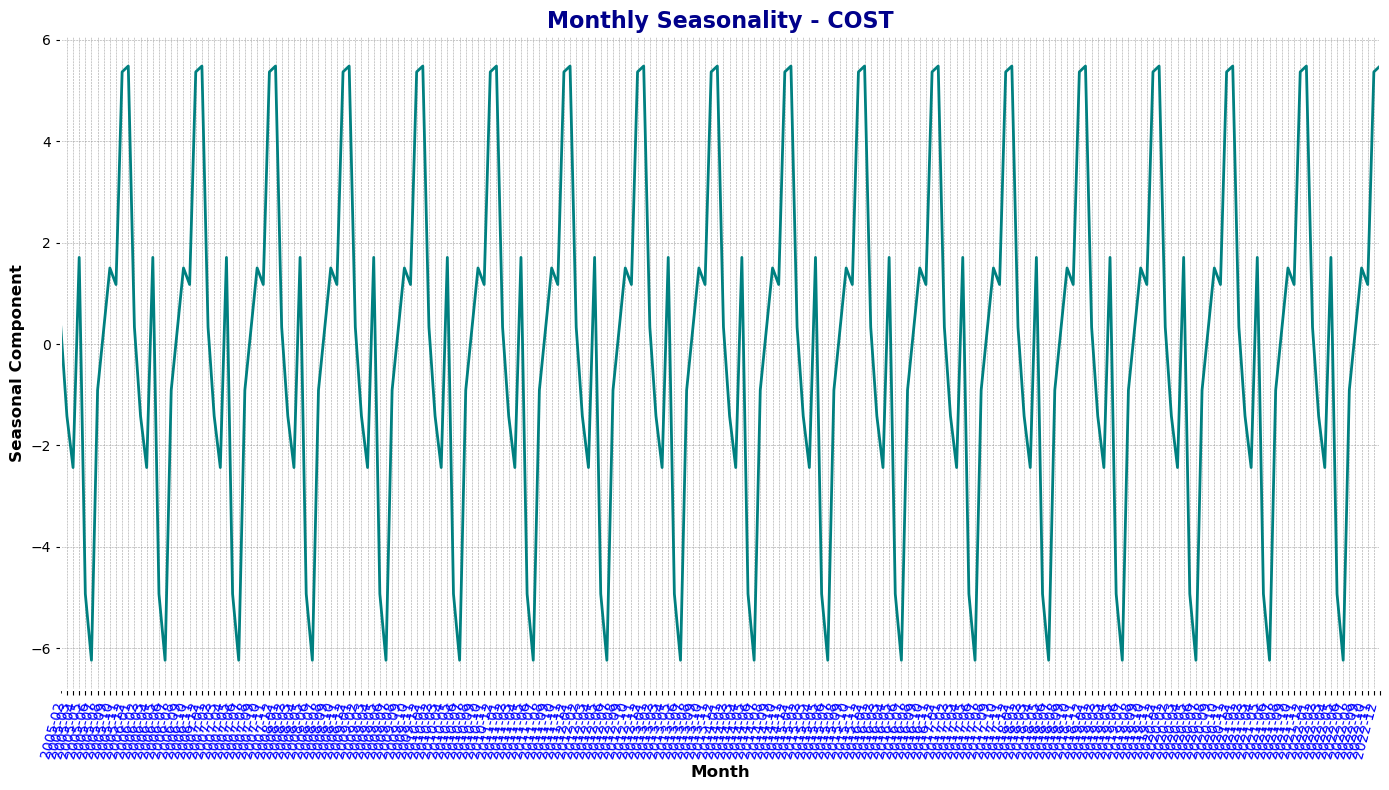

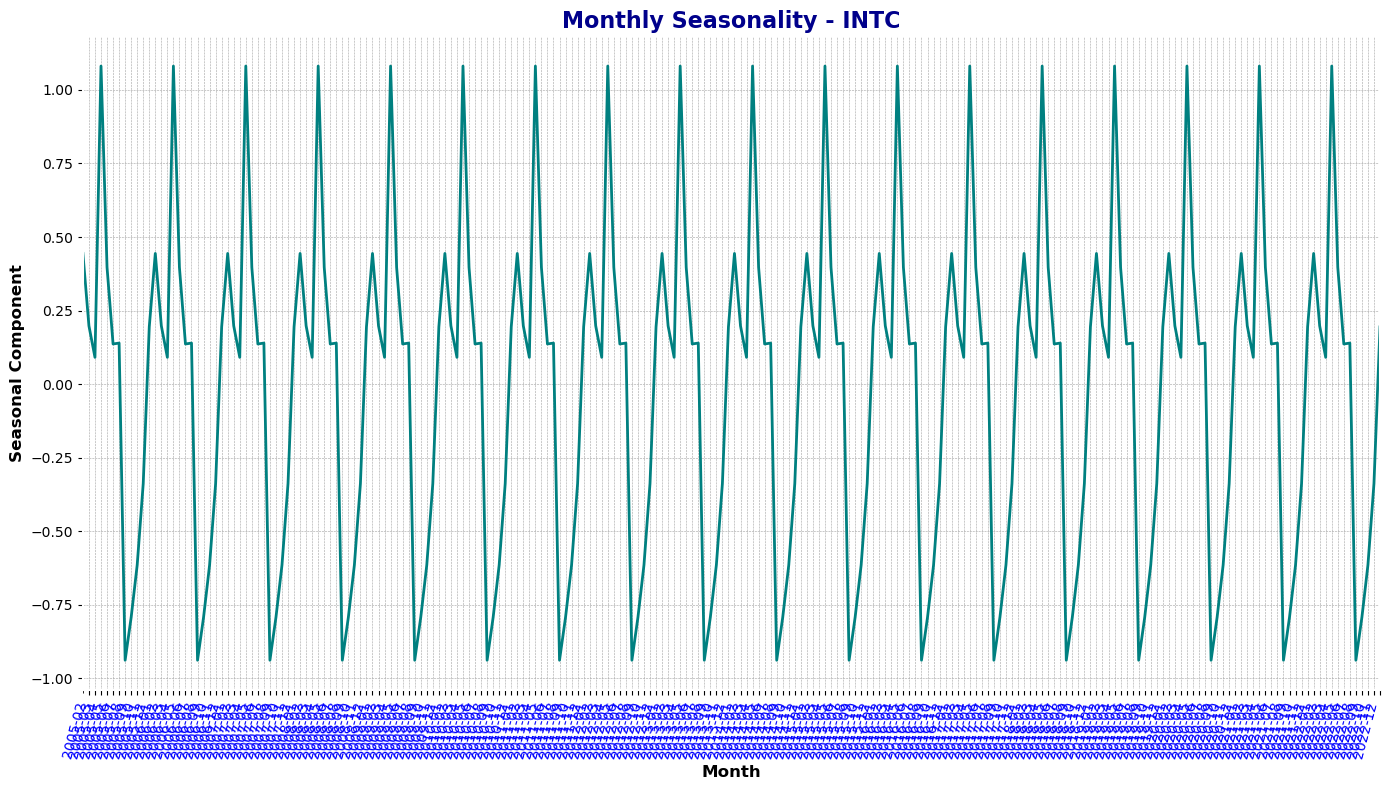

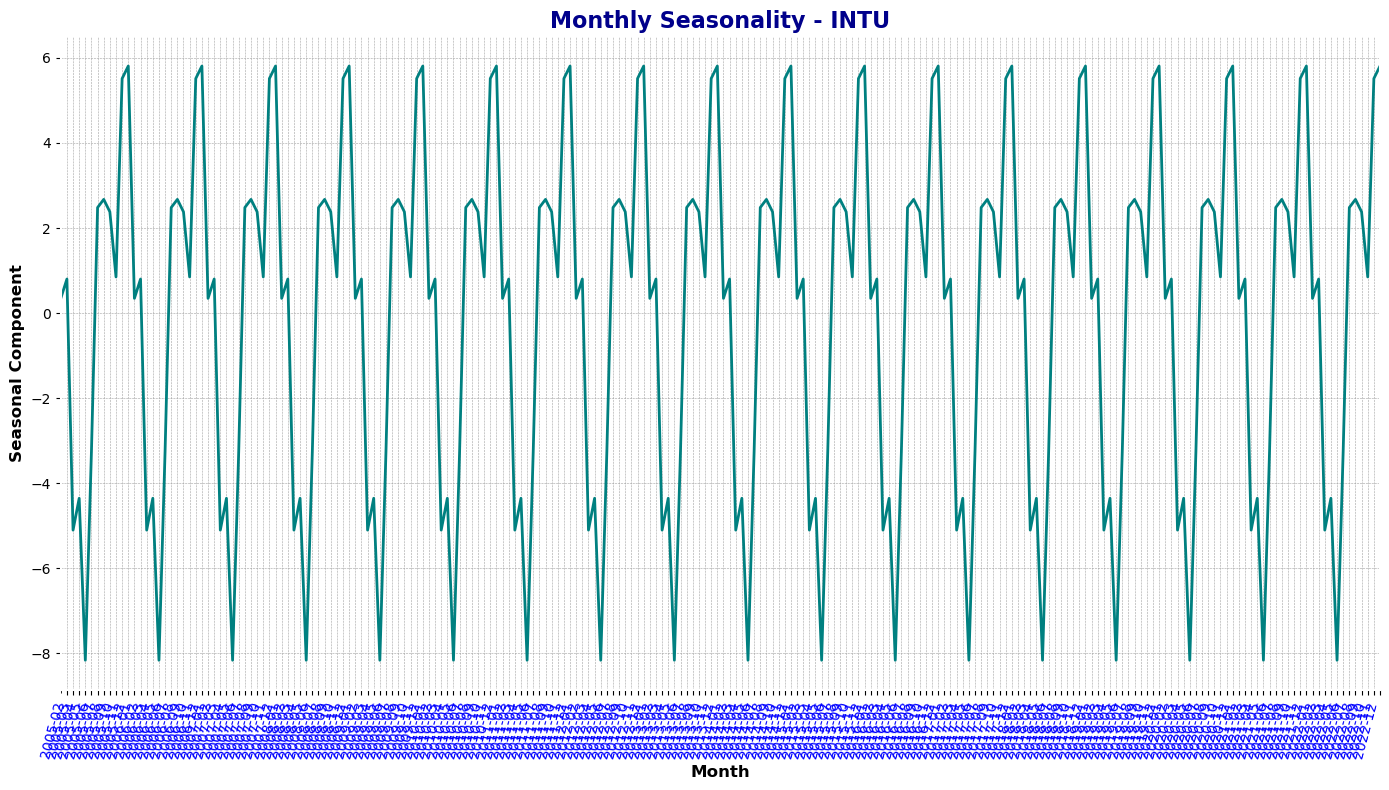

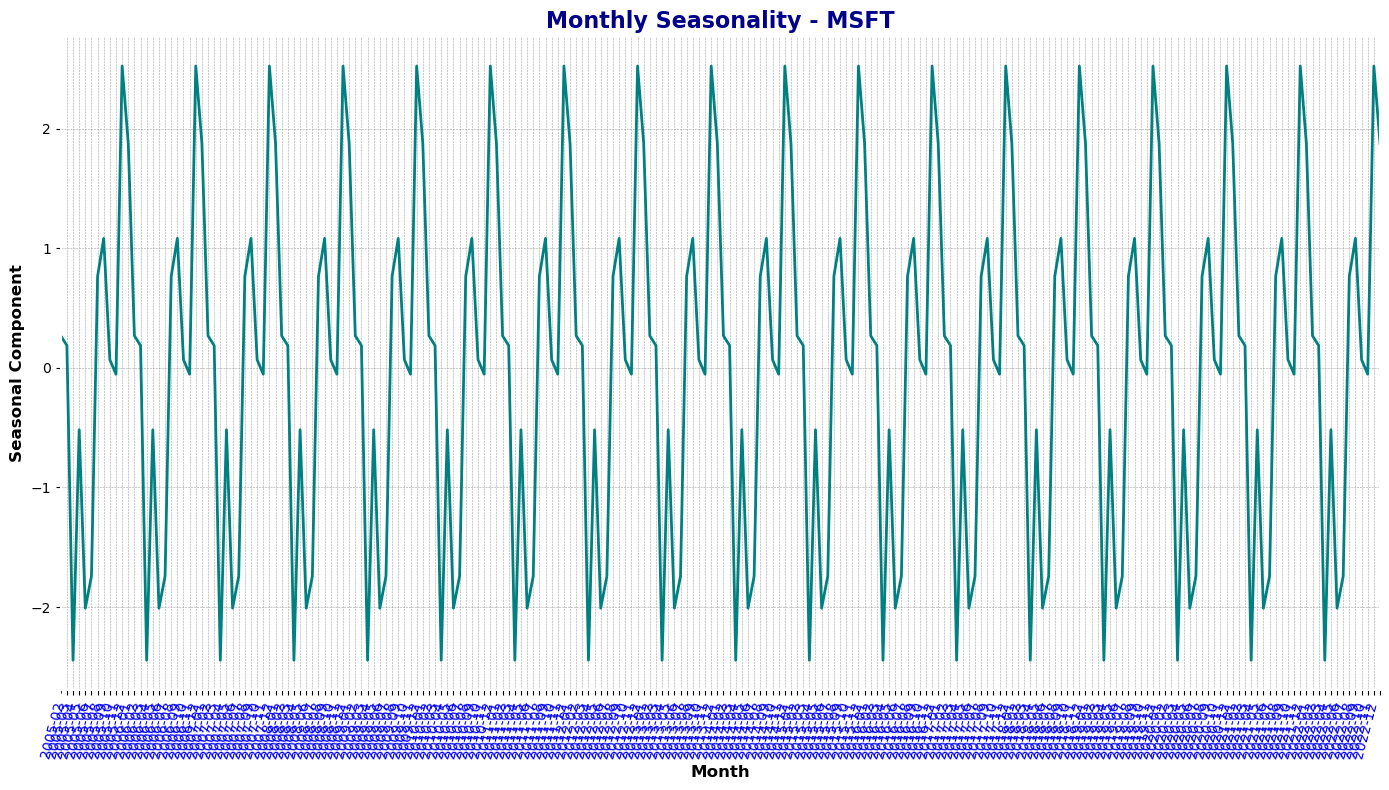

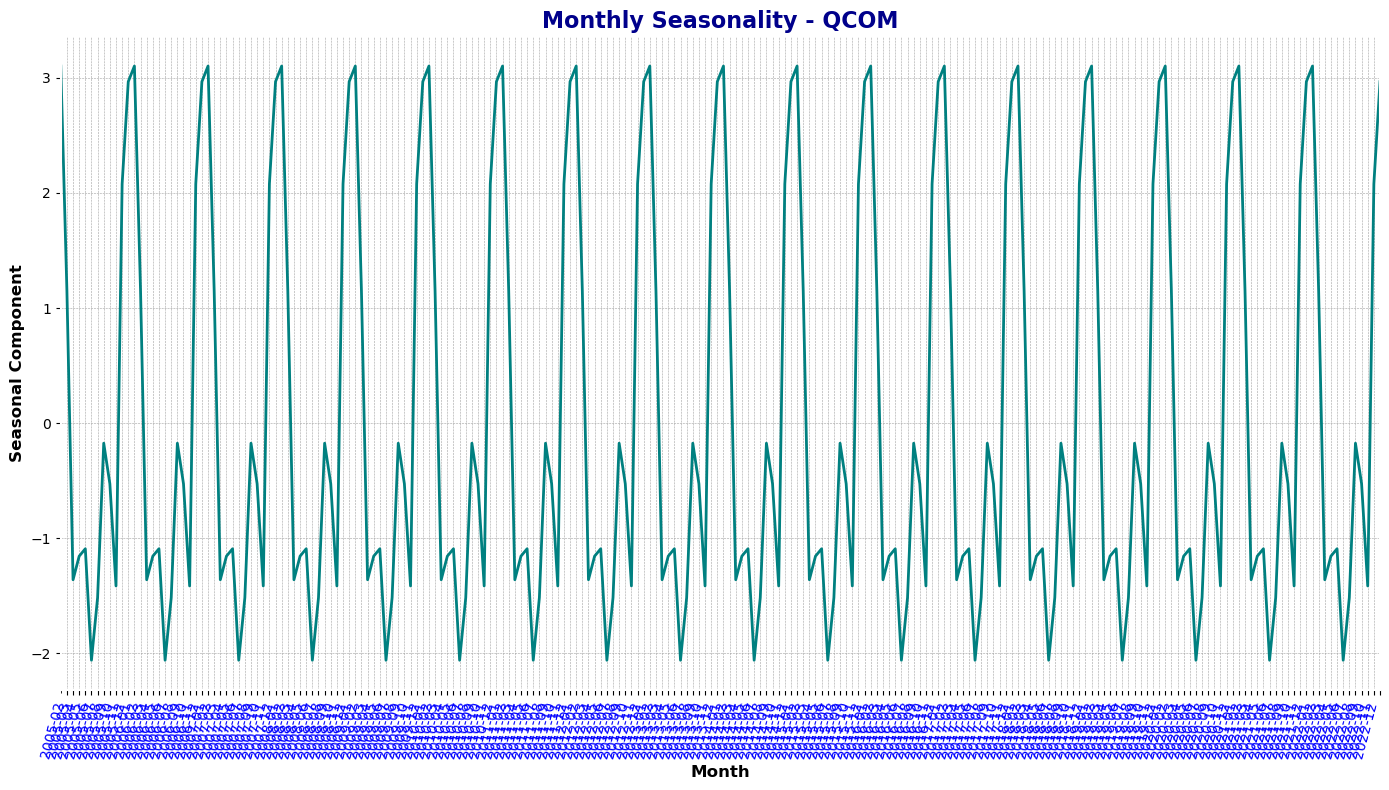

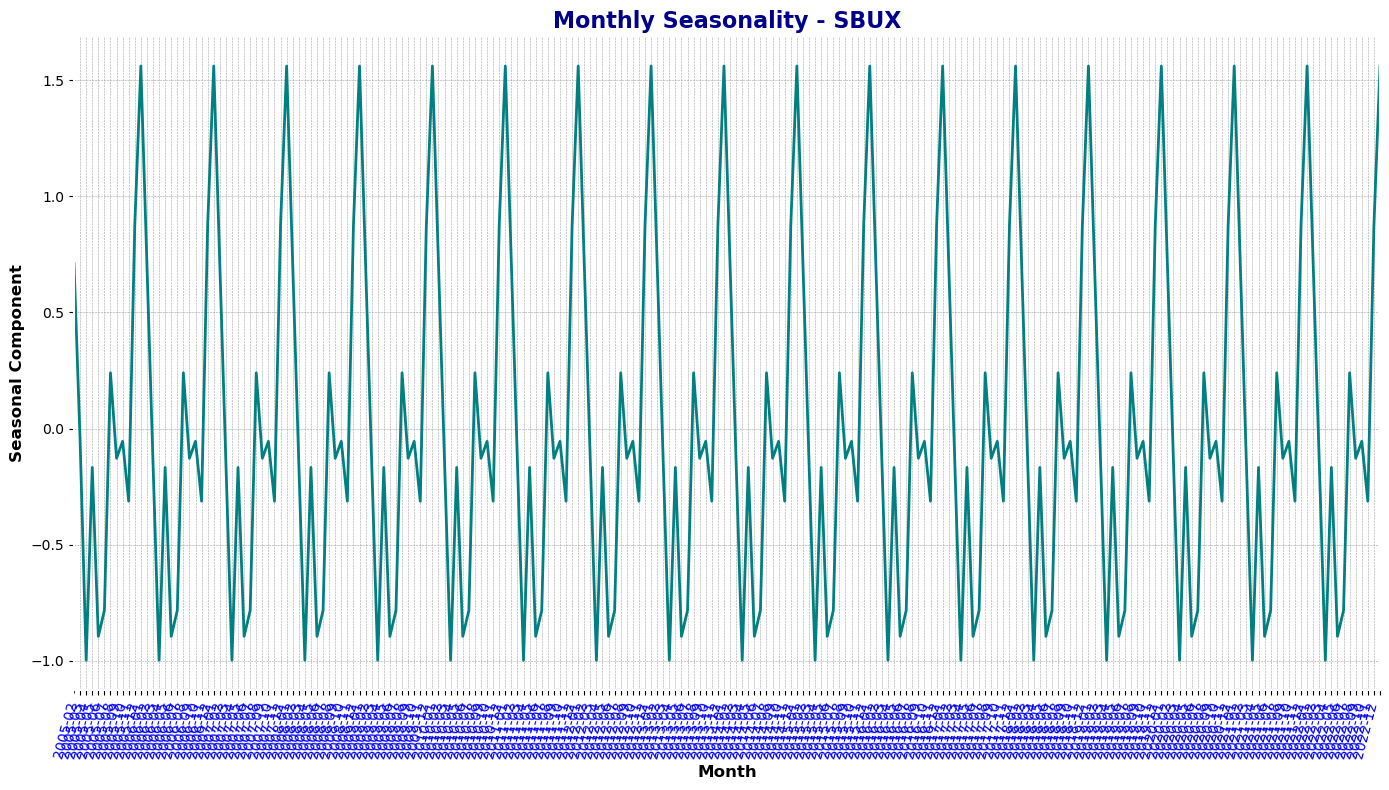

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define a function to perform seasonal decomposition and plot the results
def seasonal_decomposition_analysis(df, title):
    df_seasonality = df.copy()

    if not isinstance(df_seasonality.index, pd.DatetimeIndex):
        df_seasonality.index = pd.to_datetime(df_seasonality.index)

    monthly_data = df_seasonality['Close'].resample('M').mean()
    decomposition = sm.tsa.seasonal_decompose(monthly_data, model='additive')
    fig, ax = plt.subplots(figsize=(14, 8))
    decomposition.seasonal.plot(ax=ax, color='teal', linewidth=2)
    times = pd.date_range(start=monthly_data.index.min(), end=monthly_data.index.max(), freq='MS')
    ax.set_xticks(times)
    ax.set_xticklabels(times.strftime('%Y-%m'), rotation=75, ha='right', fontsize=10, color='blue')
    for date in times:
        ax.axvline(x=date, linestyle='--', color='black', linewidth=1)
    ax.set_title(f'Monthly Seasonality - {title}', fontsize=16, fontweight='bold', color='darkblue')
    ax.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax.set_ylabel('Seasonal Component', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()
dfs = [(df_aapl, 'AAPL'), (df_adbe, 'ADBE'), (df_amd, 'AMD'), (df_cmcsa, 'CMCSA'),
       (df_cost, 'COST'), (df_intc, 'INTC'), (df_intu, 'INTU'), (df_msft, 'MSFT'),
       (df_qcom, 'QCOM'), (df_sbux, 'SBUX')]
for df, title in dfs:
    seasonal_decomposition_analysis(df, title)


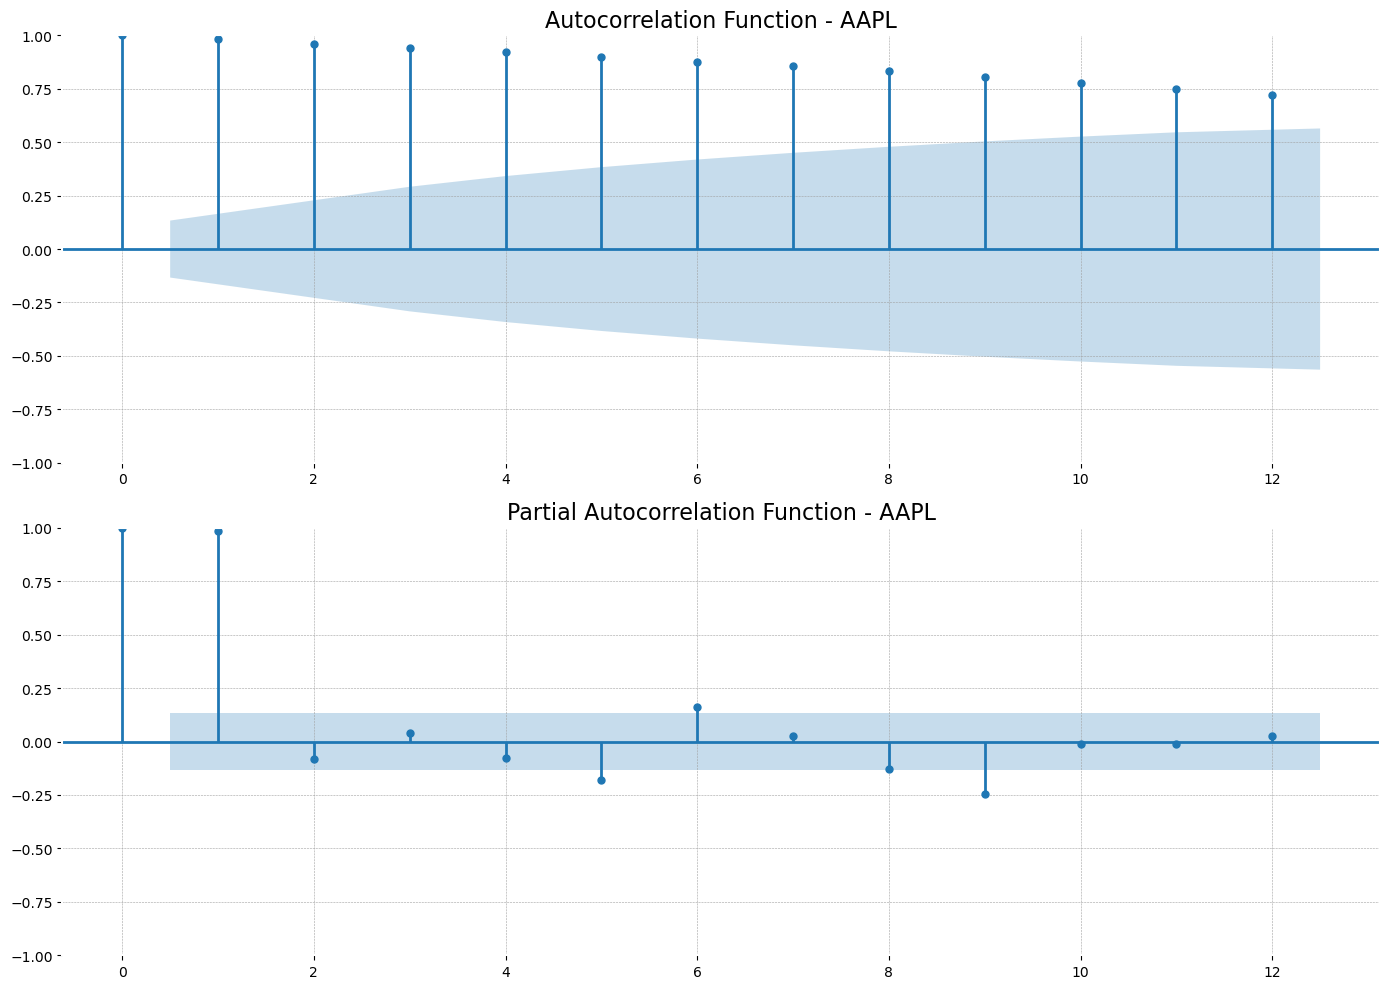

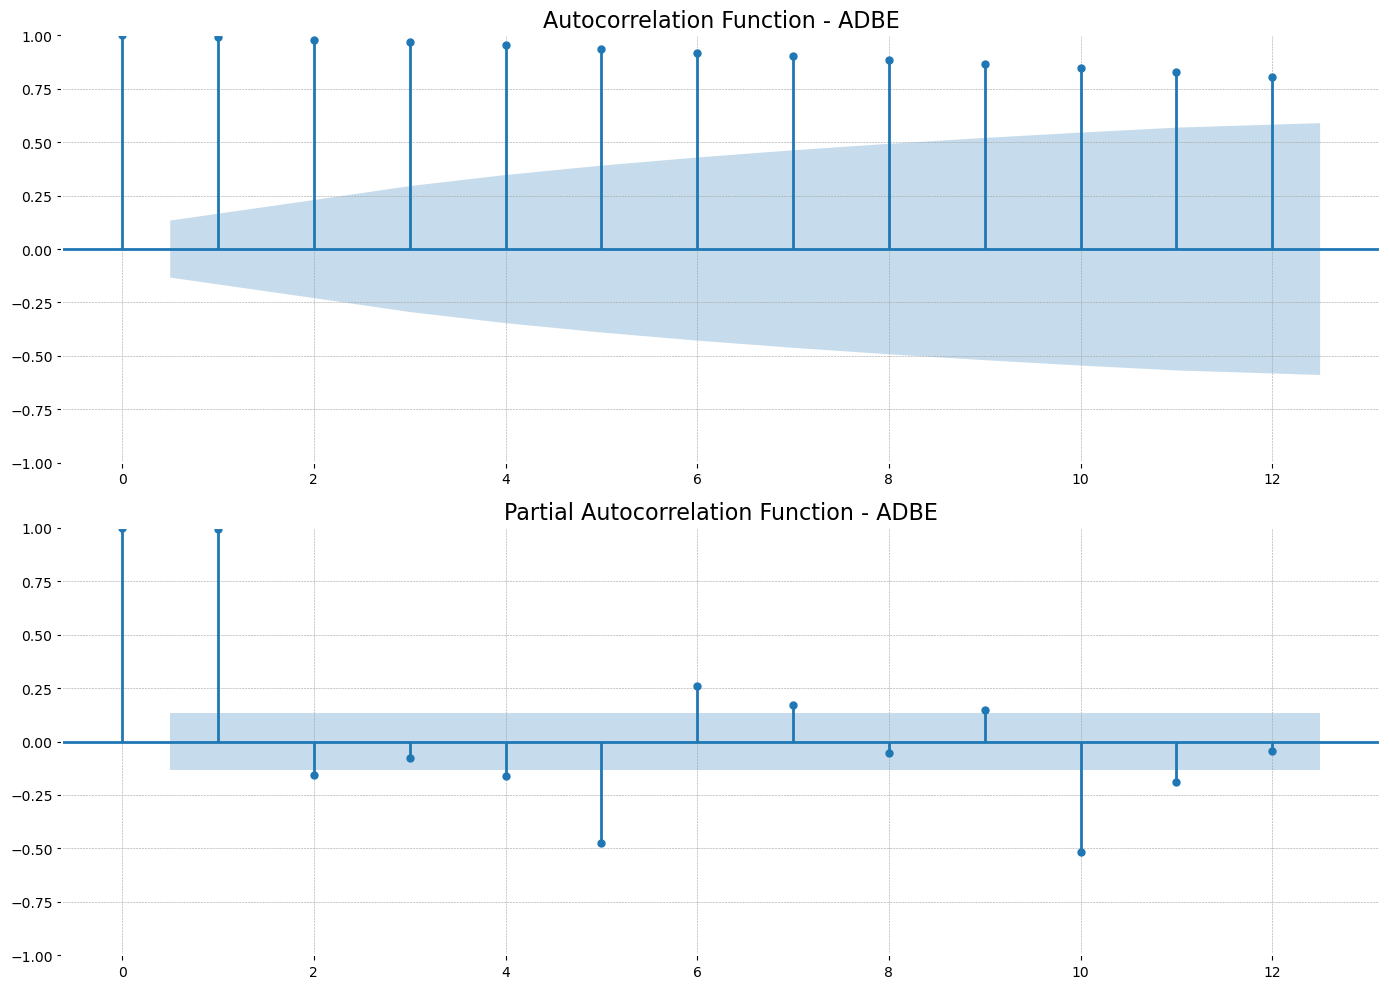

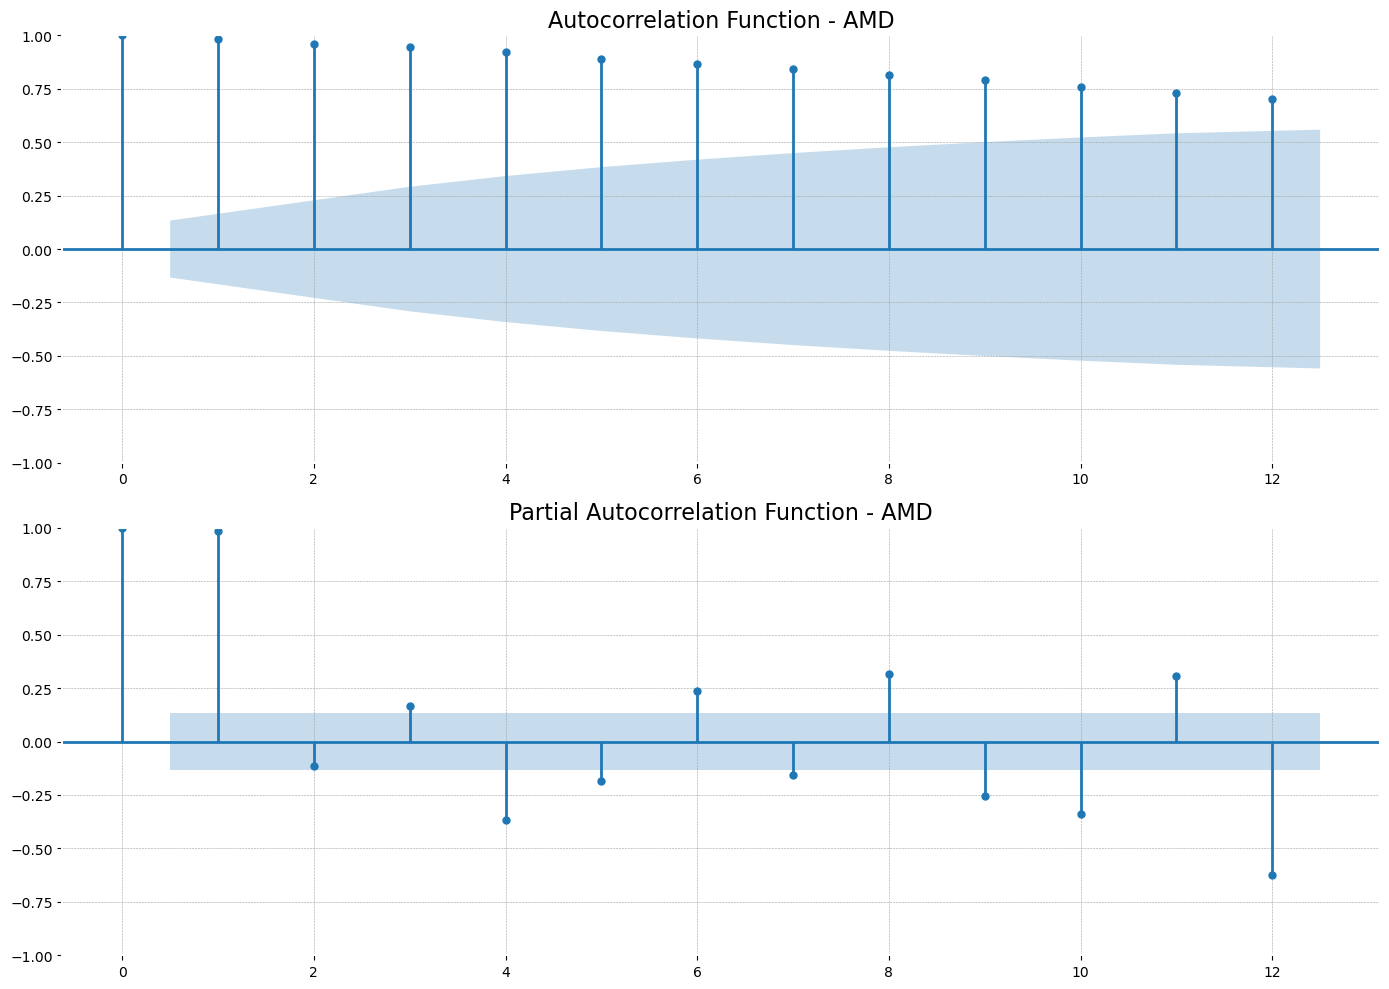

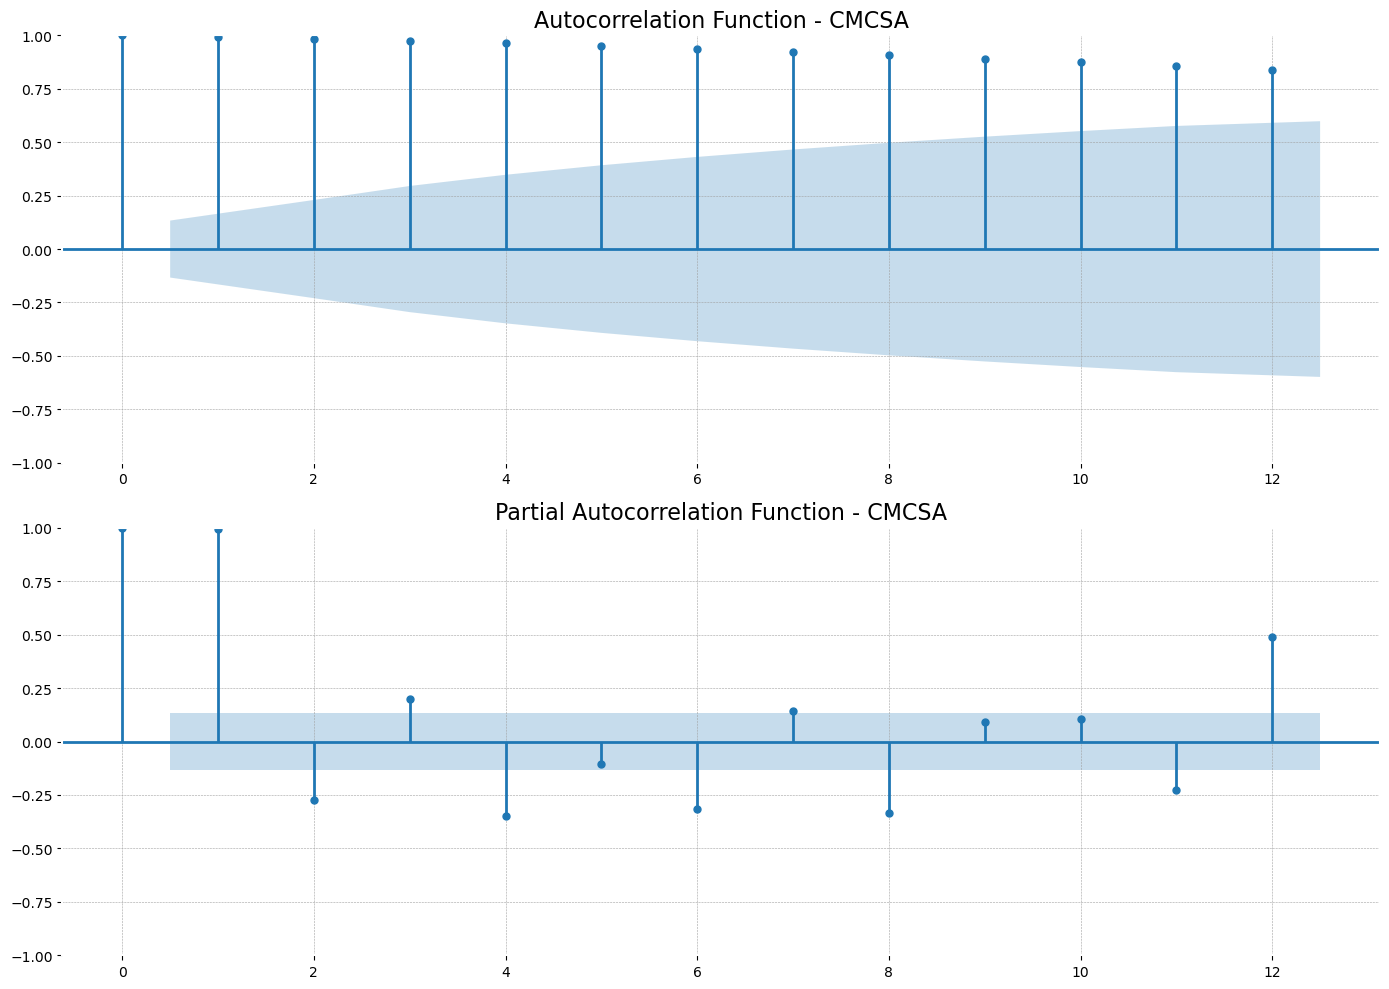

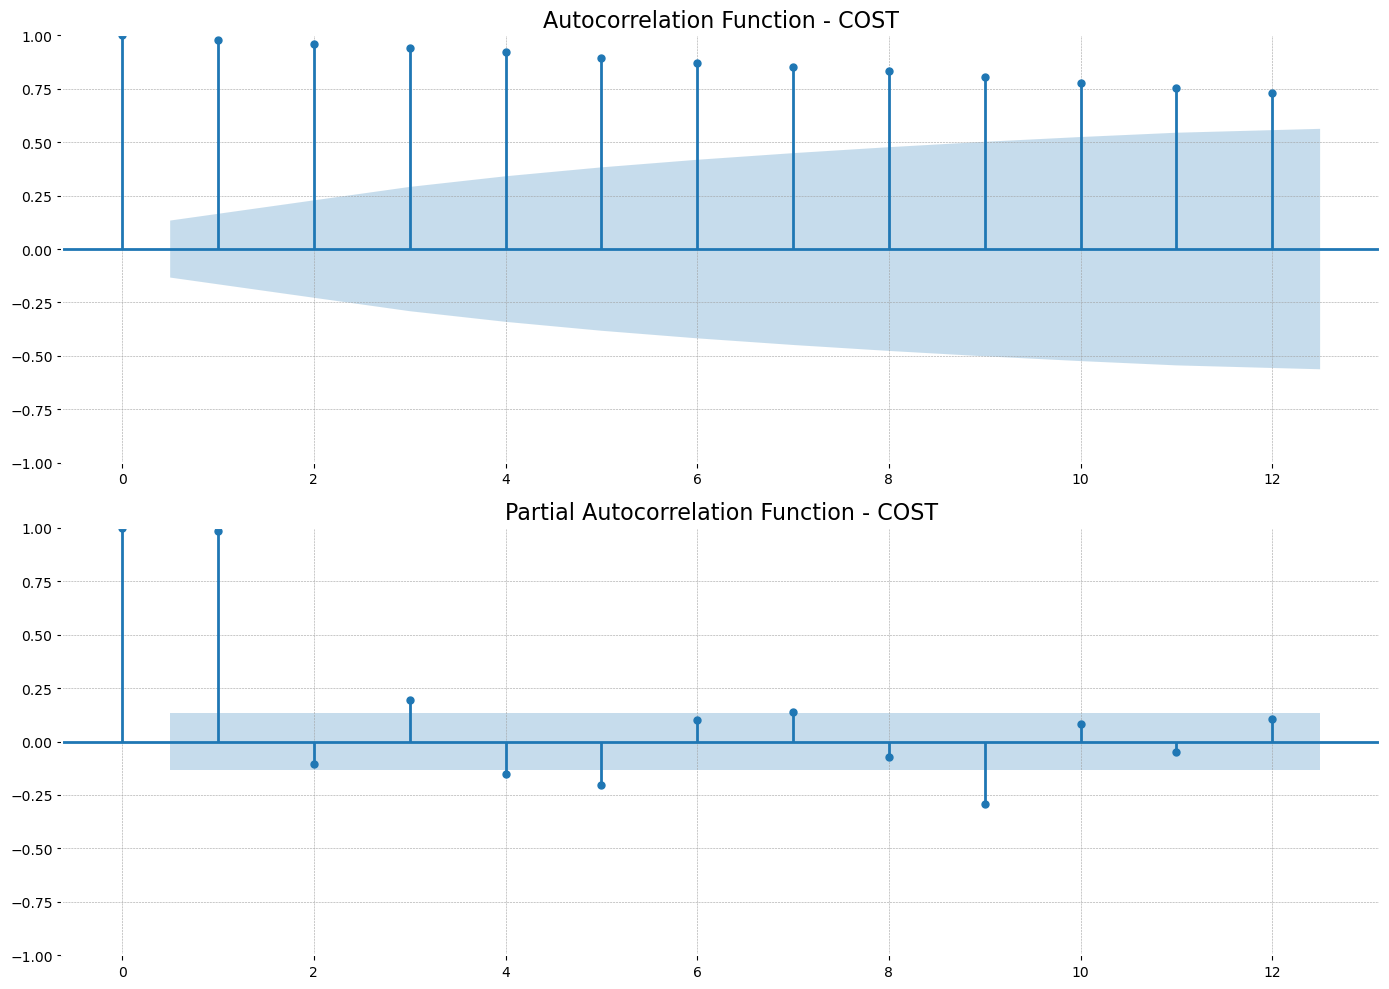

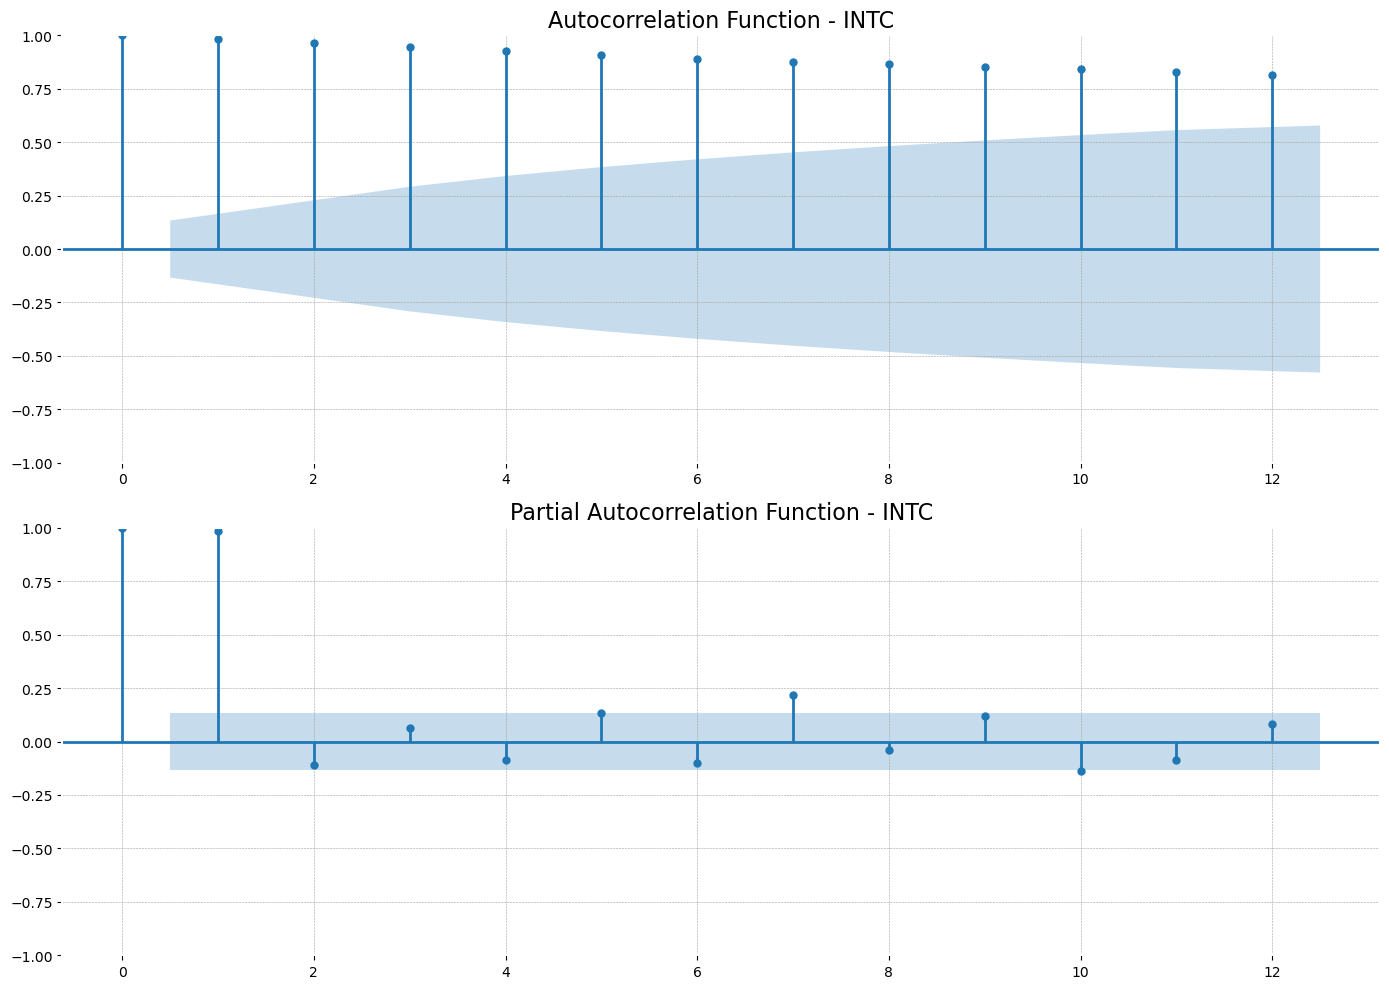

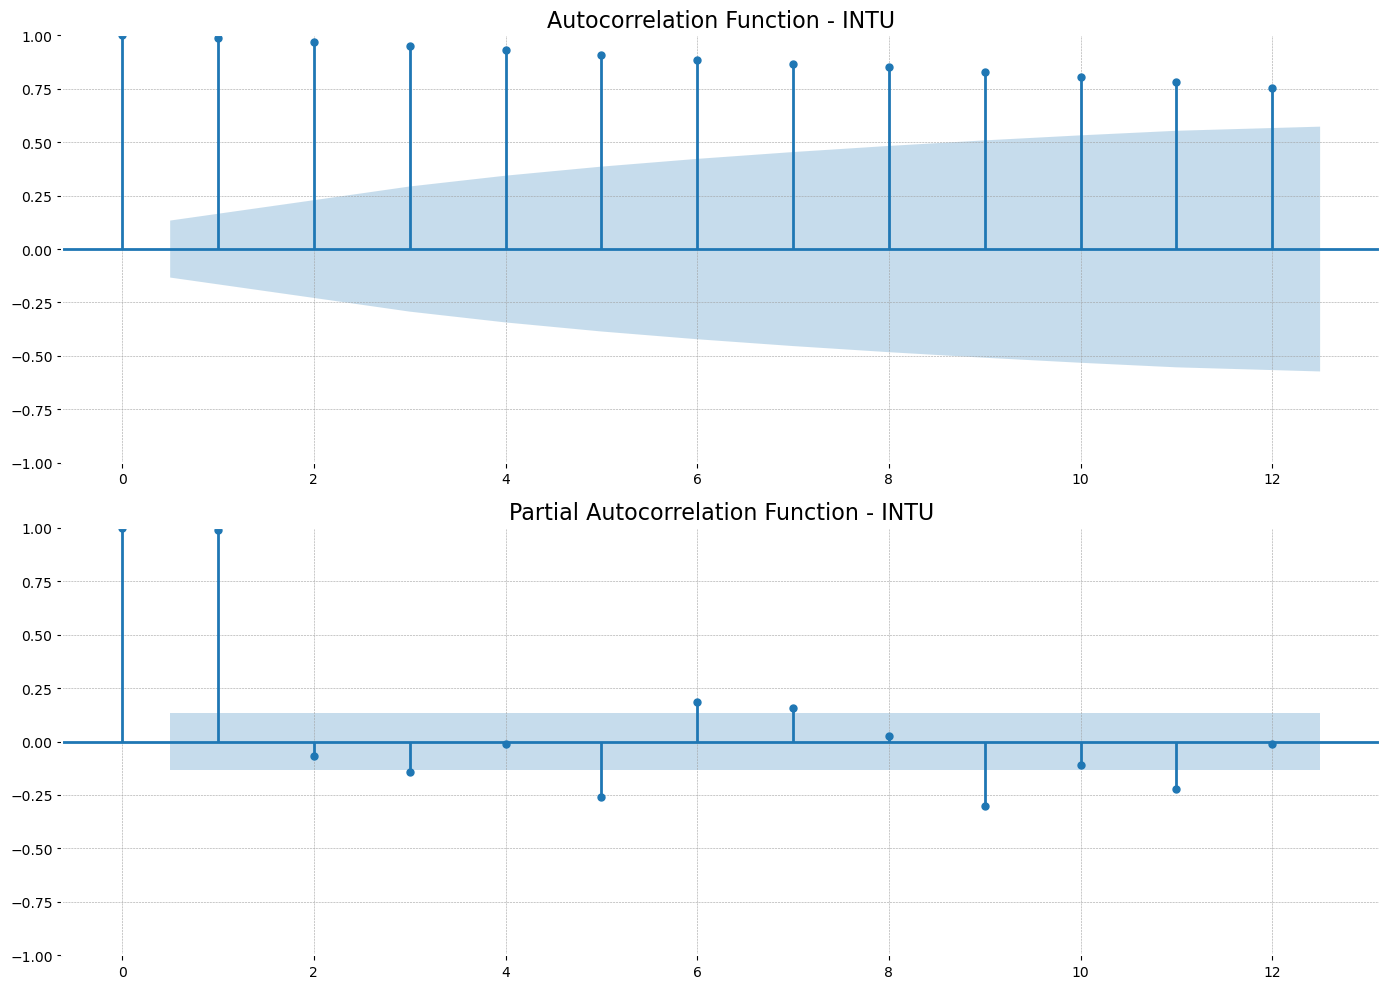

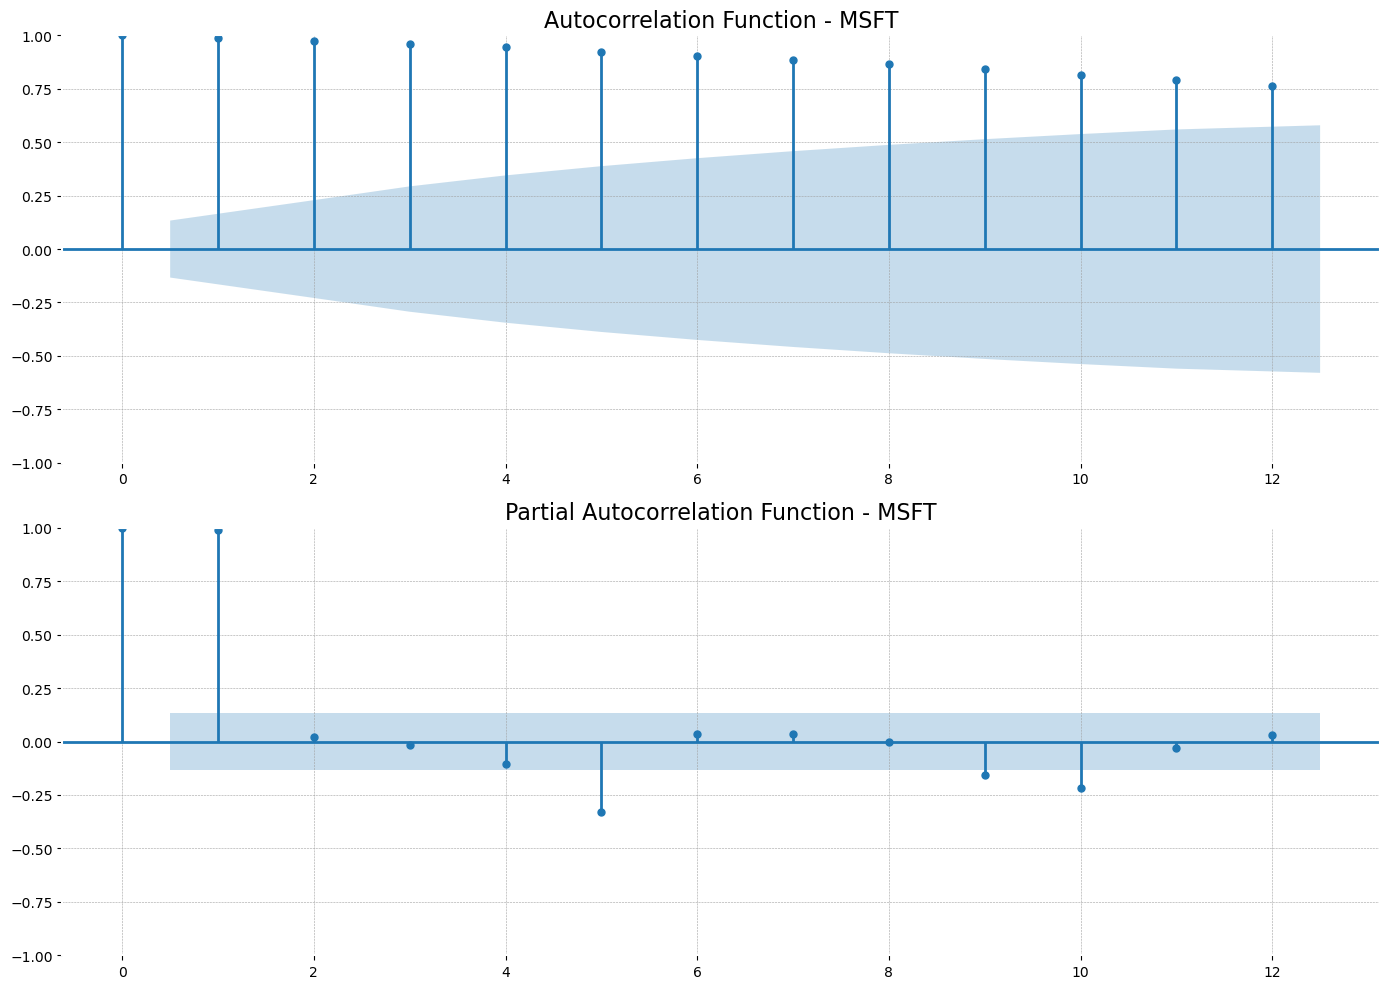

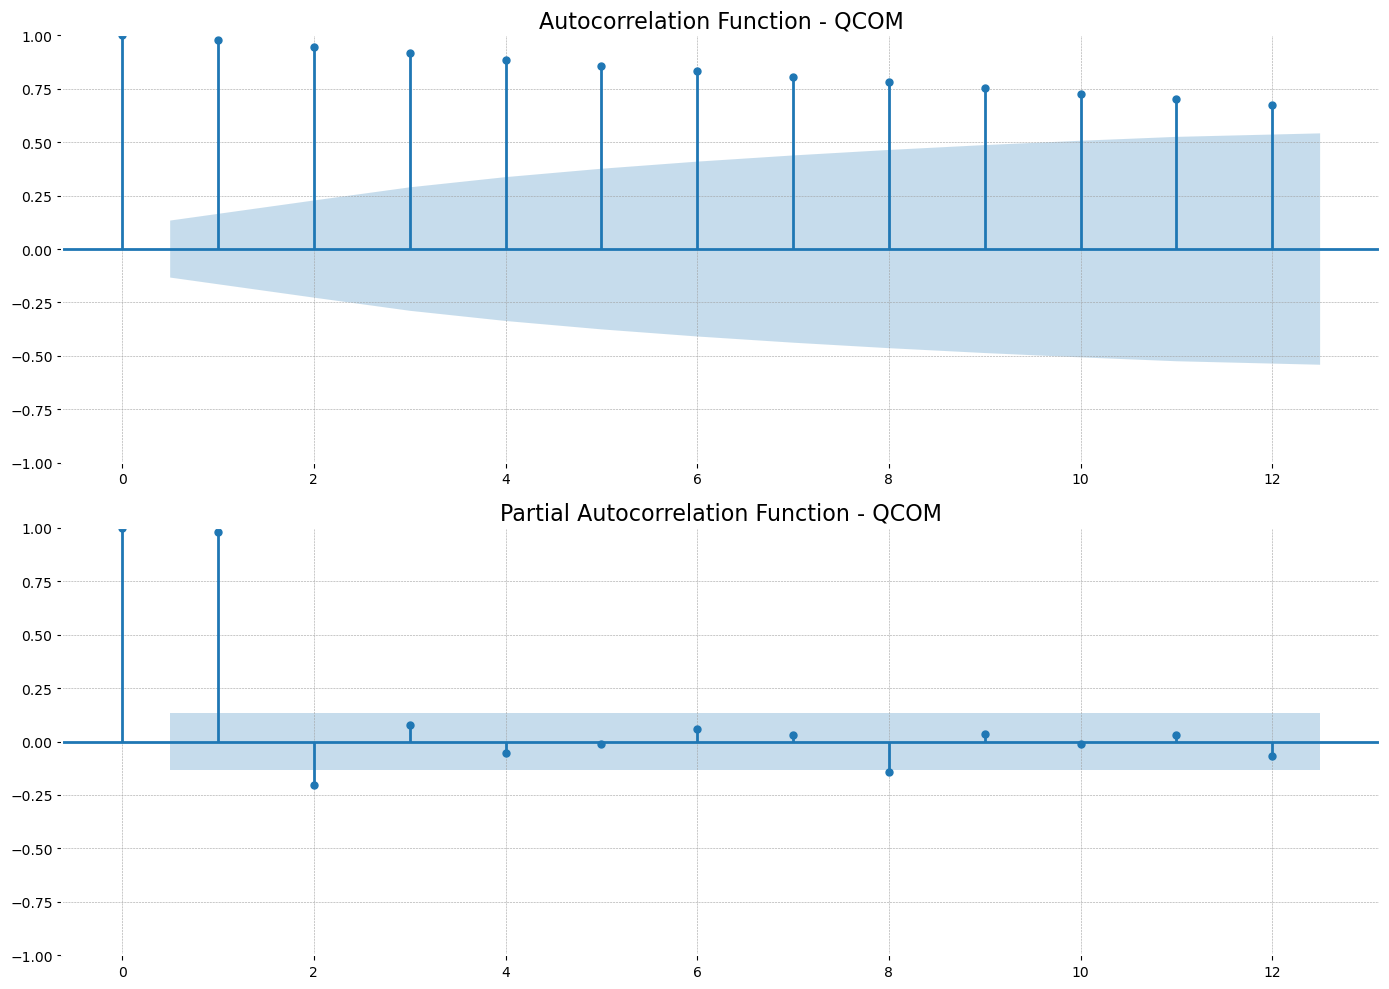

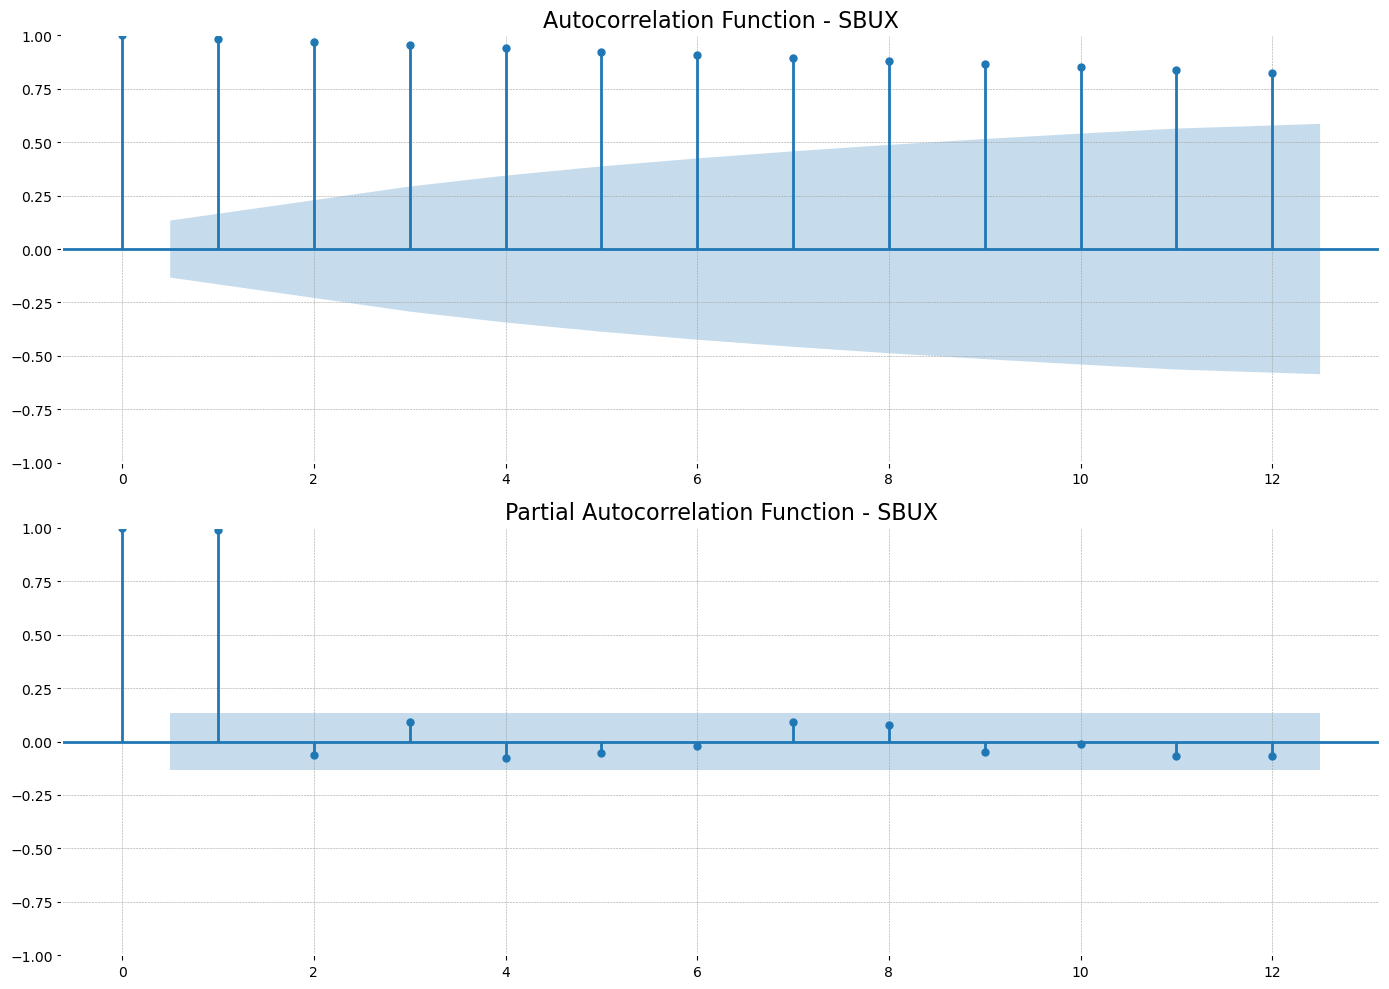

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Define a function to check and plot autocorrelation and partial autocorrelation
def check_seasonal_autocorrelation(df, title, lag=12):
    
    monthly_data = df['Close'].resample('M').mean().dropna()
    
    fig, ax = plt.subplots(2, 1, figsize=(14, 10))
    plot_acf(monthly_data, lags=lag, ax=ax[0])
    ax[0].set_title(f'Autocorrelation Function - {title}', fontsize=16)

    plot_pacf(monthly_data, lags=lag, ax=ax[1])
    ax[1].set_title(f'Partial Autocorrelation Function - {title}', fontsize=16)

    plt.tight_layout()
    plt.show()

dfs = [(df_aapl, 'AAPL'), (df_adbe, 'ADBE'), (df_amd, 'AMD'), (df_cmcsa, 'CMCSA'),
       (df_cost, 'COST'), (df_intc, 'INTC'), (df_intu, 'INTU'), (df_msft, 'MSFT'),
       (df_qcom, 'QCOM'), (df_sbux, 'SBUX')]

for df, title in dfs:
    check_seasonal_autocorrelation(df, title)


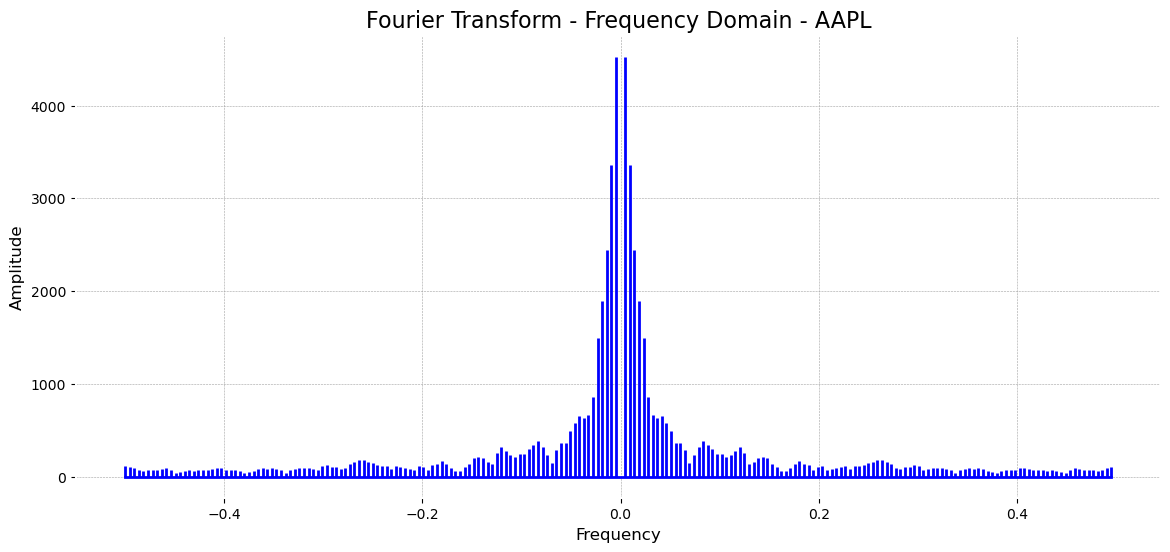

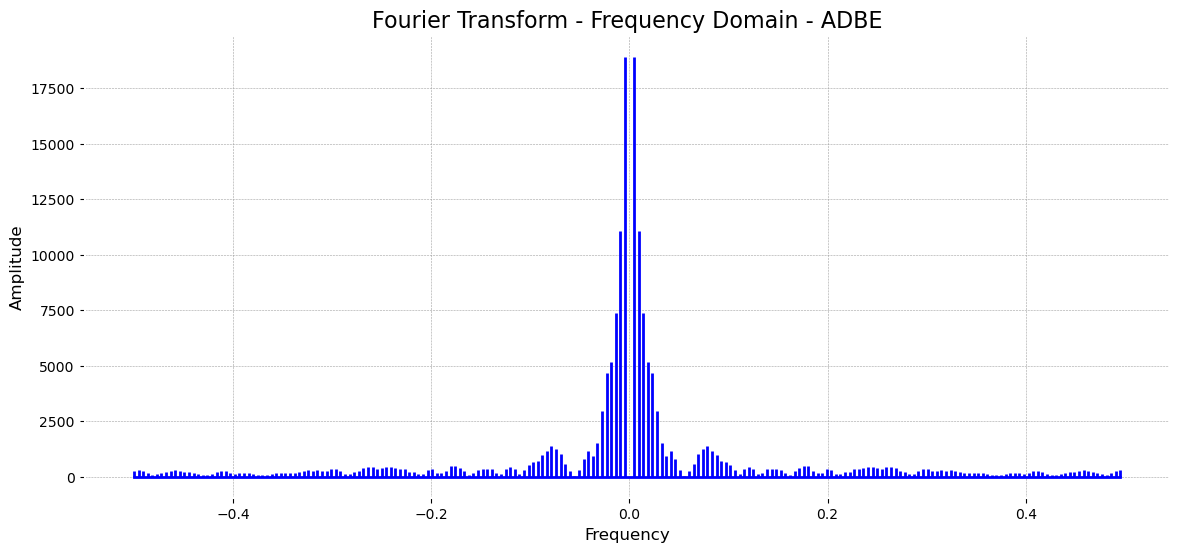

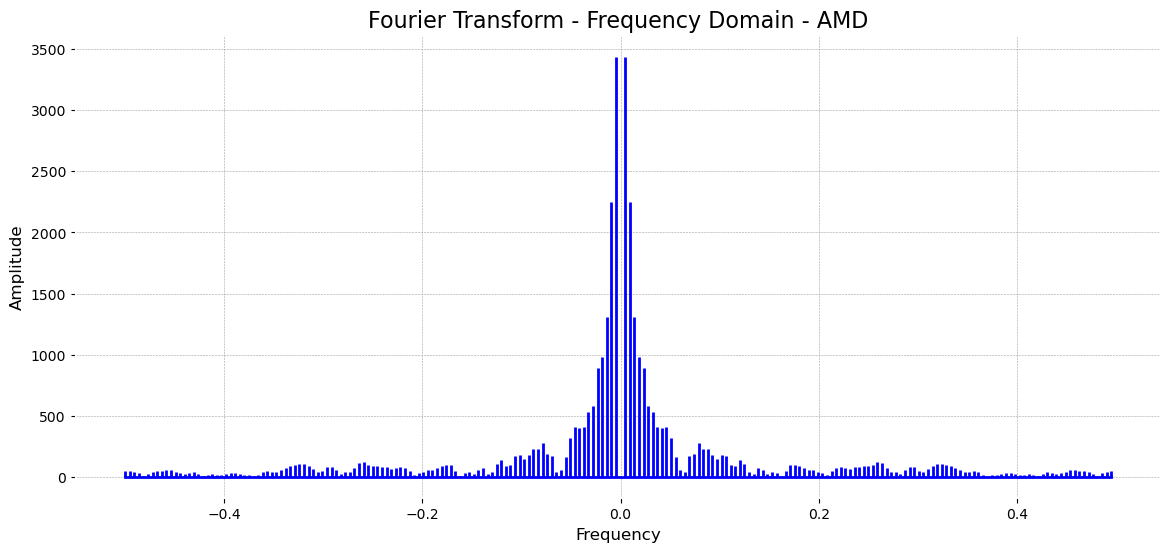

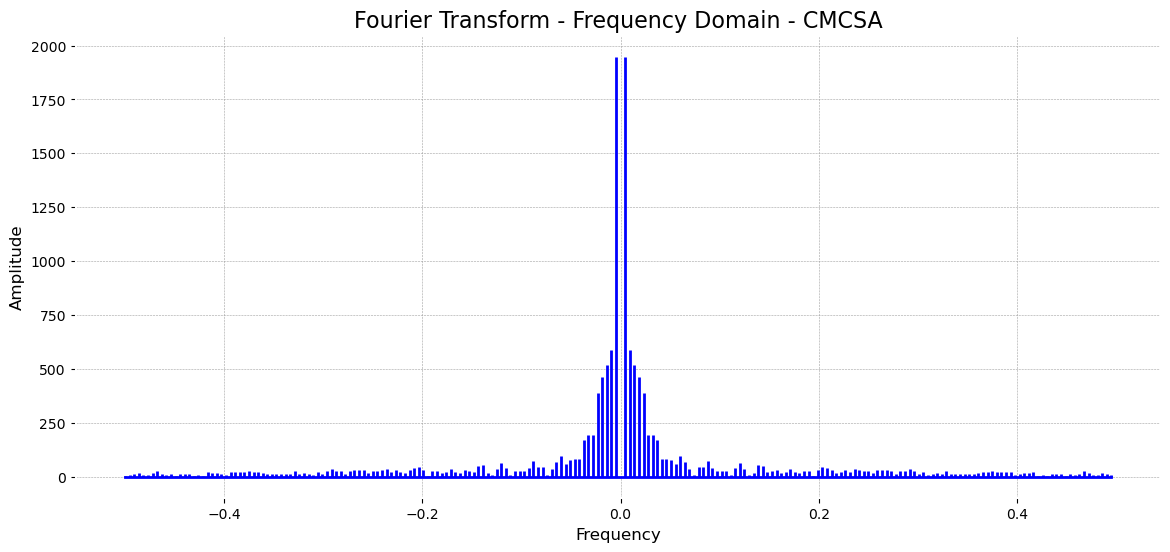

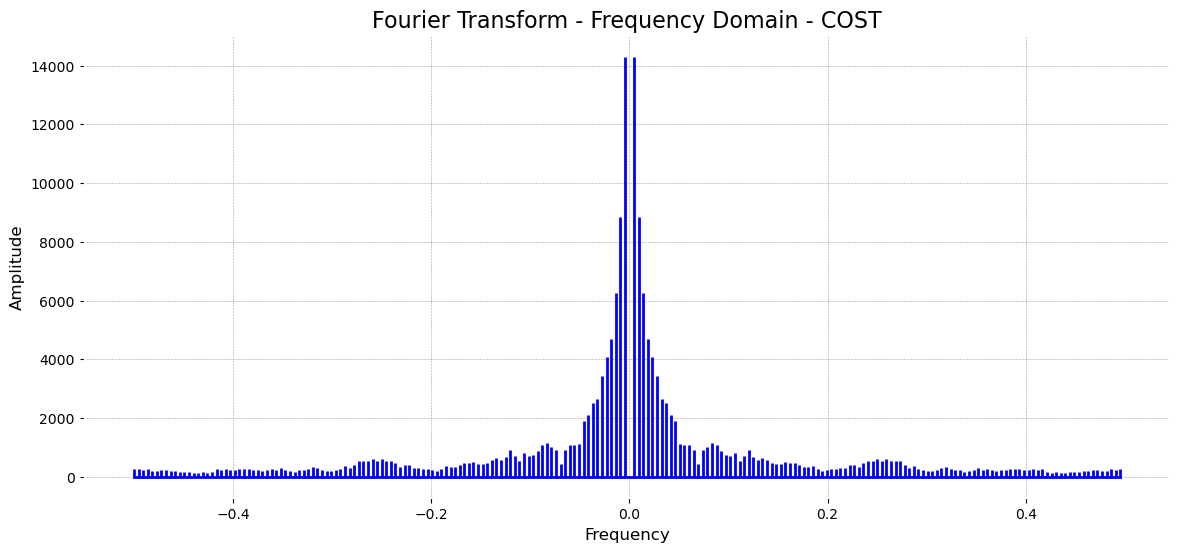

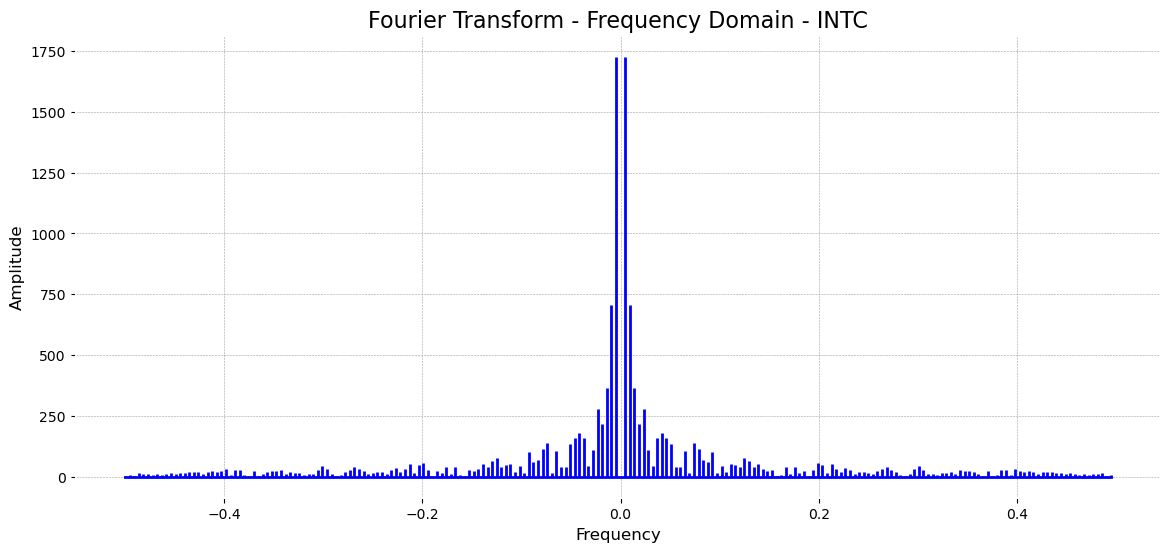

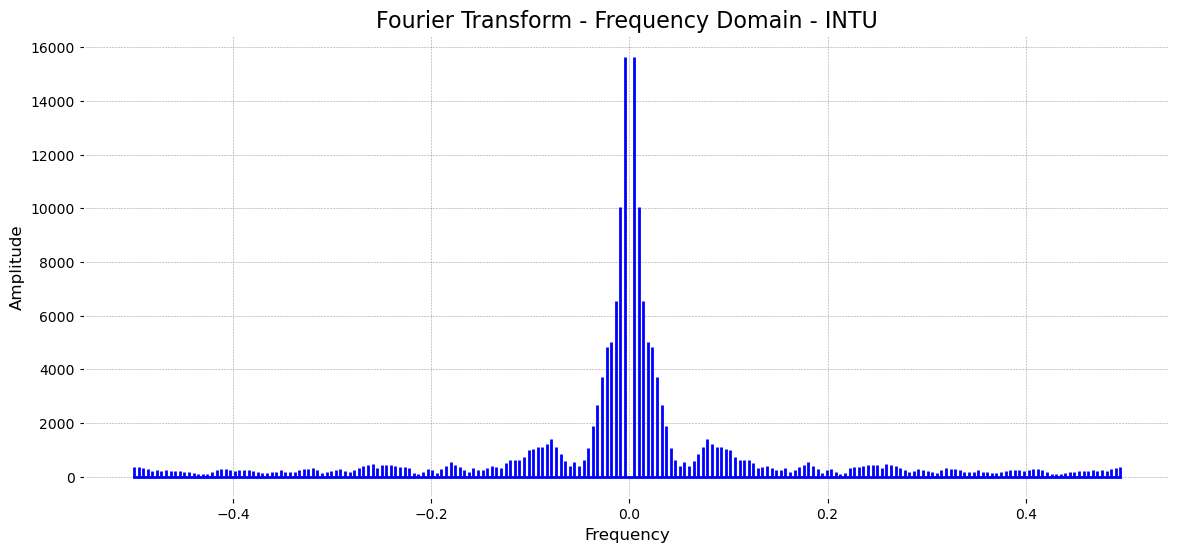

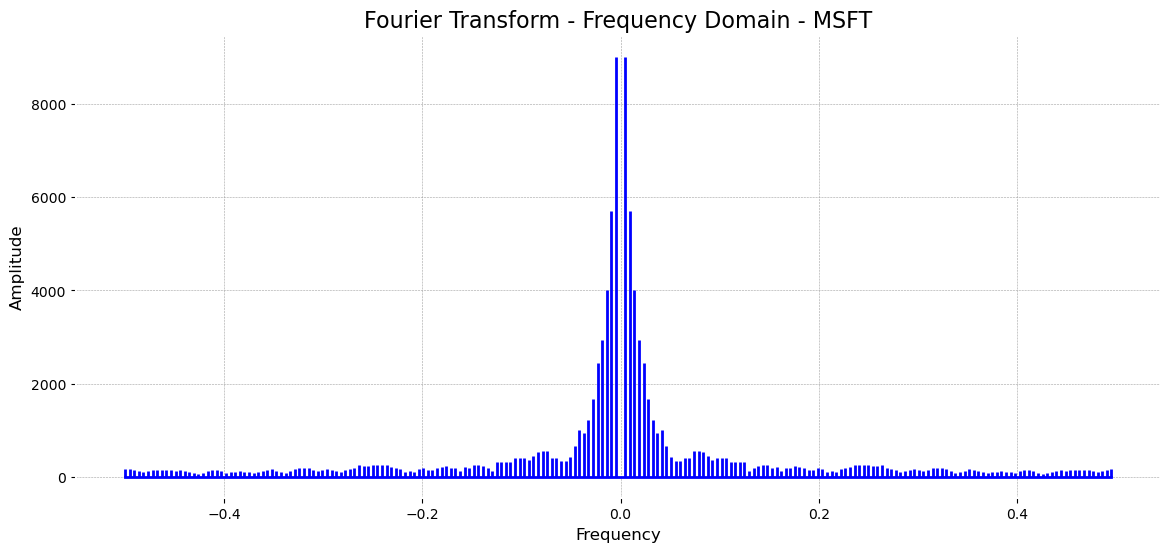

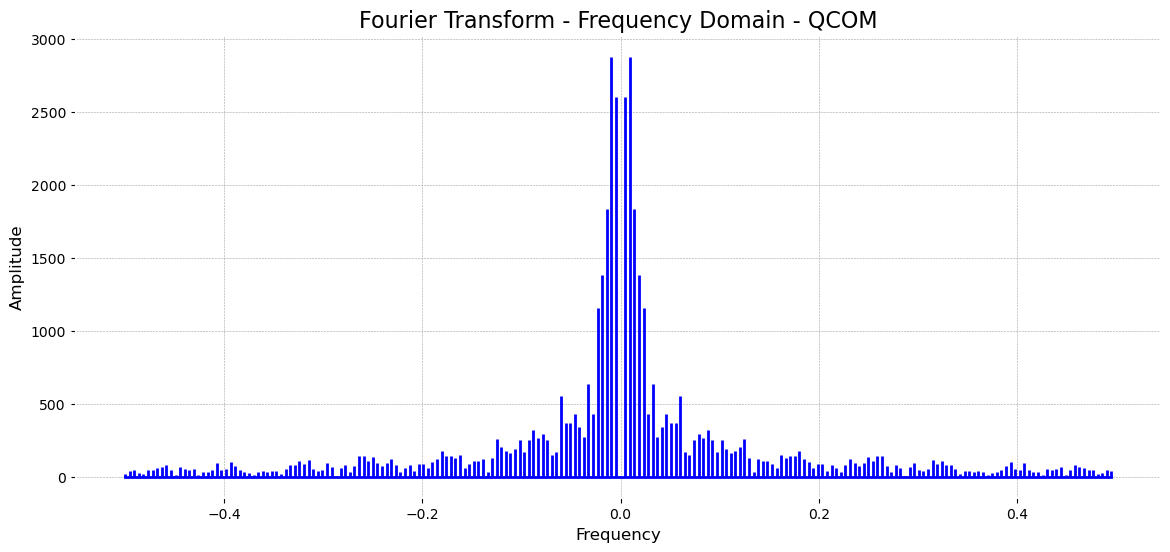

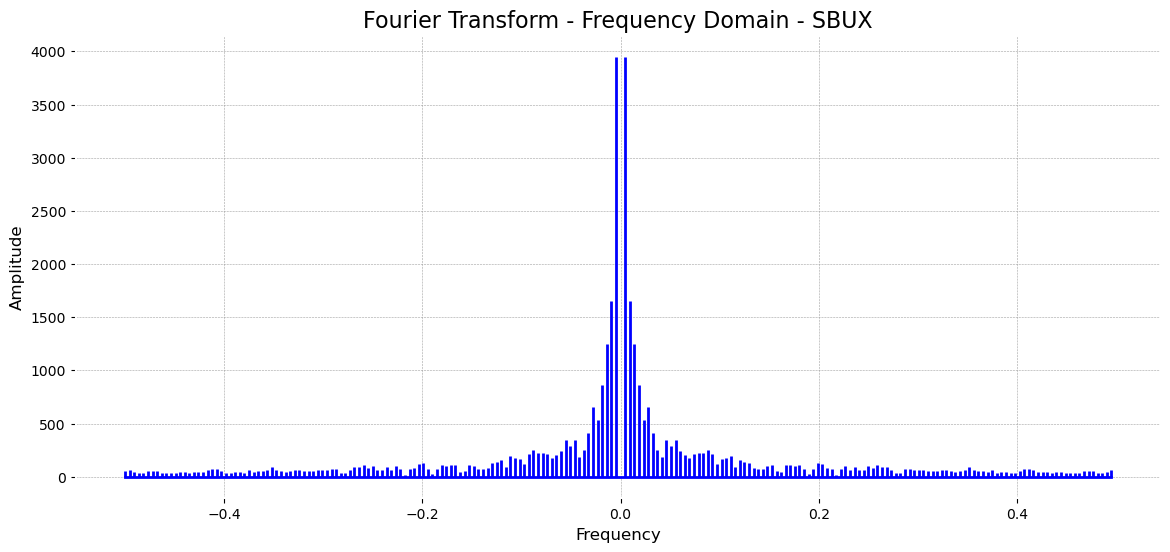

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Fourier analysis function
def fourier_analysis(df, title):
    monthly_data = df['Close'].resample('M').mean().dropna()

    n = len(monthly_data)
    freq = np.fft.fftfreq(n)
    Y = np.fft.fft(monthly_data - monthly_data.mean()) 

    plt.figure(figsize=(14, 6))
    plt.stem(freq, np.abs(Y), 'b', markerfmt=" ", basefmt="-b")
    plt.title(f'Fourier Transform - Frequency Domain - {title}', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.grid(True)
    plt.show()

dfs = [(df_aapl, 'AAPL'), (df_adbe, 'ADBE'), (df_amd, 'AMD'), (df_cmcsa, 'CMCSA'),
       (df_cost, 'COST'), (df_intc, 'INTC'), (df_intu, 'INTU'), (df_msft, 'MSFT'),
       (df_qcom, 'QCOM'), (df_sbux, 'SBUX')]

for df, title in dfs:
    fourier_analysis(df, title)


In [24]:
from statsmodels.tsa.stattools import adfuller

# Define the ADF test function
def adf_test(df, title):
    monthly_data = df['Close'].resample('M').mean().dropna()

    result = adfuller(monthly_data)
    print(f"ADF Statistic for {title}: {result[0]}")
    print(f"p-value: {result[1]}")
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] < 0.05:
        print("Data is stationary.")
    else:
        print("Data is not stationary and may contain seasonal components.")
    print("\n")  

dfs = [(df_aapl, 'AAPL'), (df_adbe, 'ADBE'), (df_amd, 'AMD'), (df_cmcsa, 'CMCSA'),
       (df_cost, 'COST'), (df_intc, 'INTC'), (df_intu, 'INTU'), (df_msft, 'MSFT'),
       (df_qcom, 'QCOM'), (df_sbux, 'SBUX')]

for df, title in dfs:
    adf_test(df, title)

ADF Statistic for AAPL: -0.994199877019761
p-value: 0.7553738798504355
Critical Values:
	1%: -3.462980134086401
	5%: -2.875885461947131
	10%: -2.5744164898444515
Data is not stationary and may contain seasonal components.


ADF Statistic for ADBE: -1.9391960710037646
p-value: 0.3138525320325174
Critical Values:
	1%: -3.462980134086401
	5%: -2.875885461947131
	10%: -2.5744164898444515
Data is not stationary and may contain seasonal components.


ADF Statistic for AMD: -2.4326777542410705
p-value: 0.13272492854364099
Critical Values:
	1%: -3.463476079125
	5%: -2.876102355
	10%: -2.574532225
Data is not stationary and may contain seasonal components.


ADF Statistic for CMCSA: -0.829315593981075
p-value: 0.8103588220126197
Critical Values:
	1%: -3.462980134086401
	5%: -2.875885461947131
	10%: -2.5744164898444515
Data is not stationary and may contain seasonal components.


ADF Statistic for COST: 3.374826512432431
p-value: 1.0
Critical Values:
	1%: -3.4631437906252636
	5%: -2.875957037982